## Problem Statement



XYZ operates over 3,000 drug stores in 7 countries. XYZ store managers are currently tasked with predicting their daily sales up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school, and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

You are provided with historical sales data for 1,115 XYZ stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

**Id** - an Id that represents a (Store, Date) duple within the set

**Store** - a unique Id for each store

**Sales** - the turnover for any given day (Dependent Variable)

**Customers** - the number of customers on a given day

**Open** - an indicator for whether the store was open: 0 = closed, 1 = open

**State Holiday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

**School Holiday** - indicates if the (Store) was affected by the closure of public schools

**Store Type** - differentiates between 4 different store models: a, b, c, d

**Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.

**Competition Distance** – the distance in meters to the nearest competitor store

**Competition Open Since[Month/Year]** - gives the approximate year and month of the time the nearest competitor was opened

**Promo** - indicates whether a store is running a promo on that day

**Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0
= store is not participating, 1 = store is participating

**Promo2  Since[Year/Week]** - describes the year and calendar week when the store started participating in Promo2

**Promo Interval** - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb, May, Aug, Nov" means each round starts in February, May, August, and November of any given year for that store.



In [179]:
#import necessary libraries
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

import warnings
warnings.filterwarnings('ignore')

## Import the data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
sales_data = pd.read_csv(r'/content/drive/MyDrive/Project files/Salesdata.csv')
stores_data = pd.read_csv(r'/content/drive/MyDrive/Project files/store.csv')

In [5]:
#creating a copy of the imported data
sales_data_copy = sales_data.copy(deep=True)
stores_data_copy = stores_data.copy(deep=True)

In [6]:
sales_data.head(2) #viewing the sales_data

Store  DayOfWeek        Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5  31-07-2015   5263        555     1      1            0   
1      2          5  31-07-2015   6064        625     1      1            0   

   SchoolHoliday  
0              1  
1              1

In [7]:
stores_data.head(2) #viewing the stores_data

Store StoreType Assortment  CompetitionDistance  CompetitionOpenSinceMonth  \
0      1         c          a               1270.0                        9.0   
1      2         a          a                570.0                       11.0   

   CompetitionOpenSinceYear  Promo2  Promo2SinceWeek  Promo2SinceYear  \
0                    2008.0       0              NaN              NaN   
1                    2007.0       1             13.0           2010.0   

     PromoInterval  
0              NaN  
1  Jan,Apr,Jul,Oct

## Data Study

In [9]:
# Shape of the data
print('Shape of the sales data is:',sales_data.shape)
print('Shape of the stores data is:',stores_data.shape)

Shape of the sales data is: (1017209, 9)
Shape of the stores data is: (1115, 10)


In [10]:
#Column names
print('Columns in our stores data are:\n', list(stores_data.columns))
print()
print('Columns in our sales data are:\n', list(sales_data.columns))

Columns in our stores data are:
 ['Store', 'StoreType', 'Assortment', 'CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']

Columns in our sales data are:
 ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo', 'StateHoliday', 'SchoolHoliday']


### Sales_data_study

In [11]:
sales_data.info() #basic info about the sales data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [12]:
sales_data.describe().T #statistical description about the sales data

count         mean          std  min     25%     50%  \
Store          1017209.0   558.429727   321.908651  1.0   280.0   558.0   
DayOfWeek      1017209.0     3.998341     1.997391  1.0     2.0     4.0   
Sales          1017209.0  5773.818972  3849.926175  0.0  3727.0  5744.0   
Customers      1017209.0   633.145946   464.411734  0.0   405.0   609.0   
Open           1017209.0     0.830107     0.375539  0.0     1.0     1.0   
Promo          1017209.0     0.381515     0.485759  0.0     0.0     0.0   
SchoolHoliday  1017209.0     0.178647     0.383056  0.0     0.0     0.0   

                  75%      max  
Store           838.0   1115.0  
DayOfWeek         6.0      7.0  
Sales          7856.0  41551.0  
Customers       837.0   7388.0  
Open              1.0      1.0  
Promo             1.0      1.0  
SchoolHoliday     0.0      1.0

In [13]:
#Checking for NULL values
sales_data.isnull().sum() # there are no null values in sales data

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [14]:
#Checking for duplicates
print('Number of duplicates in the sales_data are:',sales_data.duplicated().sum()) #no duplicates found in sales data

Number of duplicates in the sales_data are: 0


In [15]:
#Checking number of unique values in sales_data
print('Number of unique values in each feature of sales data are:')
print('*'*35)
print('Features\tNo.of unique values')
print('*'*35)
print(sales_data.nunique())

Number of unique values in each feature of sales data are:
***********************************
Features	No.of unique values
***********************************
Store             1115
DayOfWeek            7
Date               942
Sales            21734
Customers         4086
Open                 2
Promo                2
StateHoliday         5
SchoolHoliday        2
dtype: int64


In [16]:
#Checking unique values of each feature in sales_data
print('Unique values in each feature of sales data are:')
print('*'*50)

for i in sales_data.columns:
    print(i)
    print(sales_data[i].unique())
    print('*'*65)

Unique values in each feature of sales data are:
**************************************************
Store
[   1    2    3 ... 1113 1114 1115]
*****************************************************************
DayOfWeek
[5 4 3 2 1 7 6]
*****************************************************************
Date
['31-07-2015' '30-07-2015' '29-07-2015' '28-07-2015' '27-07-2015'
 '26-07-2015' '25-07-2015' '24-07-2015' '23-07-2015' '22-07-2015'
 '21-07-2015' '20-07-2015' '19-07-2015' '18-07-2015' '17-07-2015'
 '16-07-2015' '15-07-2015' '14-07-2015' '13-07-2015' '12-07-2015'
 '11-07-2015' '10-07-2015' '09-07-2015' '08-07-2015' '07-07-2015'
 '06-07-2015' '05-07-2015' '04-07-2015' '03-07-2015' '02-07-2015'
 '01-07-2015' '30-06-2015' '29-06-2015' '28-06-2015' '27-06-2015'
 '26-06-2015' '25-06-2015' '24-06-2015' '23-06-2015' '22-06-2015'
 '21-06-2015' '20-06-2015' '19-06-2015' '18-06-2015' '17-06-2015'
 '16-06-2015' '15-06-2015' '14-06-2015' '13-06-2015' '12-06-2015'
 '11-06-2015' '10-06-2015' '09-06-2

In [17]:
#Checking value counts in each feature of sales_data
print('Value counts in each feature of sales data are:')
print('*'*45)

for i in sales_data.columns:
    print(sales_data[i].value_counts())
    print('*'*40)

Value counts in each feature of sales data are:
*********************************************
Store
1      942
726    942
708    942
709    942
713    942
      ... 
159    758
637    758
636    758
633    758
155    758
Name: count, Length: 1115, dtype: int64
****************************************
DayOfWeek
5    145845
4    145845
3    145665
2    145664
1    144730
7    144730
6    144730
Name: count, dtype: int64
****************************************
Date
31-07-2015    1115
06-11-2013    1115
18-11-2013    1115
17-11-2013    1115
16-11-2013    1115
              ... 
28-10-2014     935
27-10-2014     935
26-10-2014     935
25-10-2014     935
08-12-2014     935
Name: count, Length: 942, dtype: int64
****************************************
Sales
0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: count, Length: 21734, dtype: int64
********************

### Stores_data_study

In [18]:
stores_data.info() #basic info about the stores data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


In [19]:
stores_data.describe().T #statistical description about the stores data

count         mean          std     min     25%  \
Store                      1115.0   558.000000   322.017080     1.0   279.5   
CompetitionDistance        1112.0  5404.901079  7663.174720    20.0   717.5   
CompetitionOpenSinceMonth   761.0     7.224704     3.212348     1.0     4.0   
CompetitionOpenSinceYear    761.0  2008.668857     6.195983  1900.0  2006.0   
Promo2                     1115.0     0.512108     0.500078     0.0     0.0   
Promo2SinceWeek             571.0    23.595447    14.141984     1.0    13.0   
Promo2SinceYear             571.0  2011.763573     1.674935  2009.0  2011.0   

                              50%     75%      max  
Store                       558.0   836.5   1115.0  
CompetitionDistance        2325.0  6882.5  75860.0  
CompetitionOpenSinceMonth     8.0    10.0     12.0  
CompetitionOpenSinceYear   2010.0  2013.0   2015.0  
Promo2                        1.0     1.0      1.0  
Promo2SinceWeek              22.0    37.0     50.0  
Promo2SinceYear            2012.0  2013.0   2015.0

In [20]:
#Checking for NULL values
stores_data.isnull().sum()/len(stores_data) * 100

Store                         0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.269058
CompetitionOpenSinceMonth    31.748879
CompetitionOpenSinceYear     31.748879
Promo2                        0.000000
Promo2SinceWeek              48.789238
Promo2SinceYear              48.789238
PromoInterval                48.789238
dtype: float64

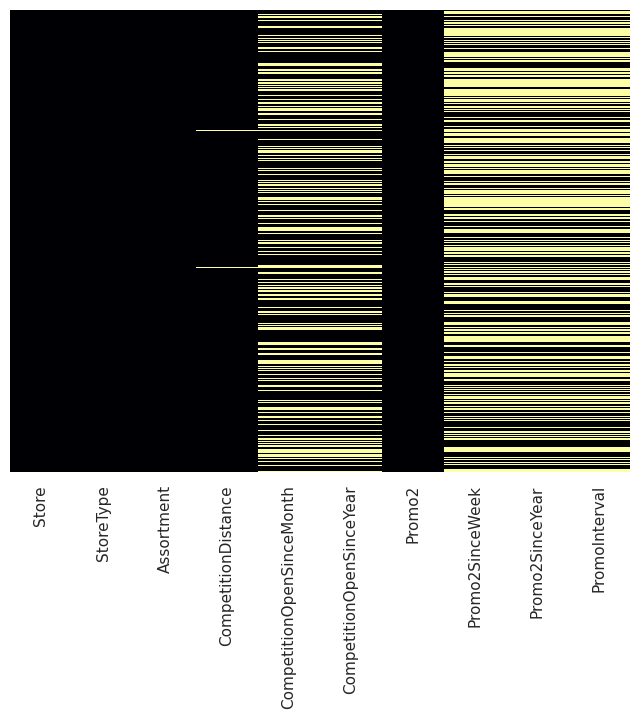

In [21]:
#Visual representation of null values in stores data
plt.figure(figsize=(8,6))
sns.heatmap(stores_data.isnull(),yticklabels=False,cbar = False,cmap = 'inferno')
plt.show()

In [22]:
#Checking for duplicates
print('Number of duplicates in the sales_data are:',stores_data.duplicated().sum()) #no duplicates found in stores data

Number of duplicates in the sales_data are: 0


In [23]:
#Checking number of unique values in stores_data
print('Number of unique values in each feature of stores data are:')
print('*'*35)
print('Features\tNo.of unique values')
print('*'*35)
print(stores_data.nunique())

Number of unique values in each feature of stores data are:
***********************************
Features	No.of unique values
***********************************
Store                        1115
StoreType                       4
Assortment                      3
CompetitionDistance           654
CompetitionOpenSinceMonth      12
CompetitionOpenSinceYear       23
Promo2                          2
Promo2SinceWeek                24
Promo2SinceYear                 7
PromoInterval                   3
dtype: int64


In [24]:
#Checking unique values of each feature in stores_data
print('Unique values in each feature of stores data are:')
print('*'*50)

for i in stores_data.columns:
    print(i)
    print(stores_data[i].unique())
    print('*'*75)

Unique values in each feature of stores data are:
**************************************************
Store
[   1    2    3 ... 1113 1114 1115]
***************************************************************************
StoreType
['c' 'a' 'd' 'b']
***************************************************************************
Assortment
['a' 'c' 'b']
***************************************************************************
CompetitionDistance
[1.270e+03 5.700e+02 1.413e+04 6.200e+02 2.991e+04 3.100e+02 2.400e+04
 7.520e+03 2.030e+03 3.160e+03 9.600e+02 1.070e+03 1.300e+03 4.110e+03
 3.270e+03 5.000e+01 1.384e+04 3.240e+03 2.340e+03 5.500e+02 1.040e+03
 4.060e+03 4.590e+03 4.300e+02 2.300e+03 6.000e+01 1.200e+03 2.170e+03
 4.000e+01 9.800e+03 2.910e+03 1.320e+03 2.240e+03 7.660e+03 5.400e+02
 4.230e+03 1.090e+03 2.600e+02 1.800e+02 1.180e+03 2.900e+02 4.880e+03
 9.710e+03 2.700e+02 1.060e+03 1.801e+04 6.260e+03 1.057e+04 4.500e+02
 3.036e+04 7.170e+03 7.200e+02 6.620e+03 4.200e+02 7.340e+0

In [25]:
#Checking value counts in each feature of stores_data
print('Value counts in each feature of stores data are:')
print('*'*45)

for i in stores_data.columns:
    print(stores_data[i].value_counts())
    print('*'*40)

Value counts in each feature of stores data are:
*********************************************
Store
1       1
742     1
748     1
747     1
746     1
       ..
378     1
379     1
380     1
381     1
1115    1
Name: count, Length: 1115, dtype: int64
****************************************
StoreType
a    602
d    348
c    148
b     17
Name: count, dtype: int64
****************************************
Assortment
a    593
c    513
b      9
Name: count, dtype: int64
****************************************
CompetitionDistance
250.0     12
1200.0     9
190.0      8
350.0      8
50.0       8
          ..
4490.0     1
8970.0     1
9720.0     1
5290.0     1
1880.0     1
Name: count, Length: 654, dtype: int64
****************************************
CompetitionOpenSinceMonth
9.0     125
4.0      94
11.0     92
3.0      70
7.0      67
12.0     64
10.0     61
6.0      50
5.0      44
2.0      41
8.0      39
1.0      14
Name: count, dtype: int64
****************************************
Competitio

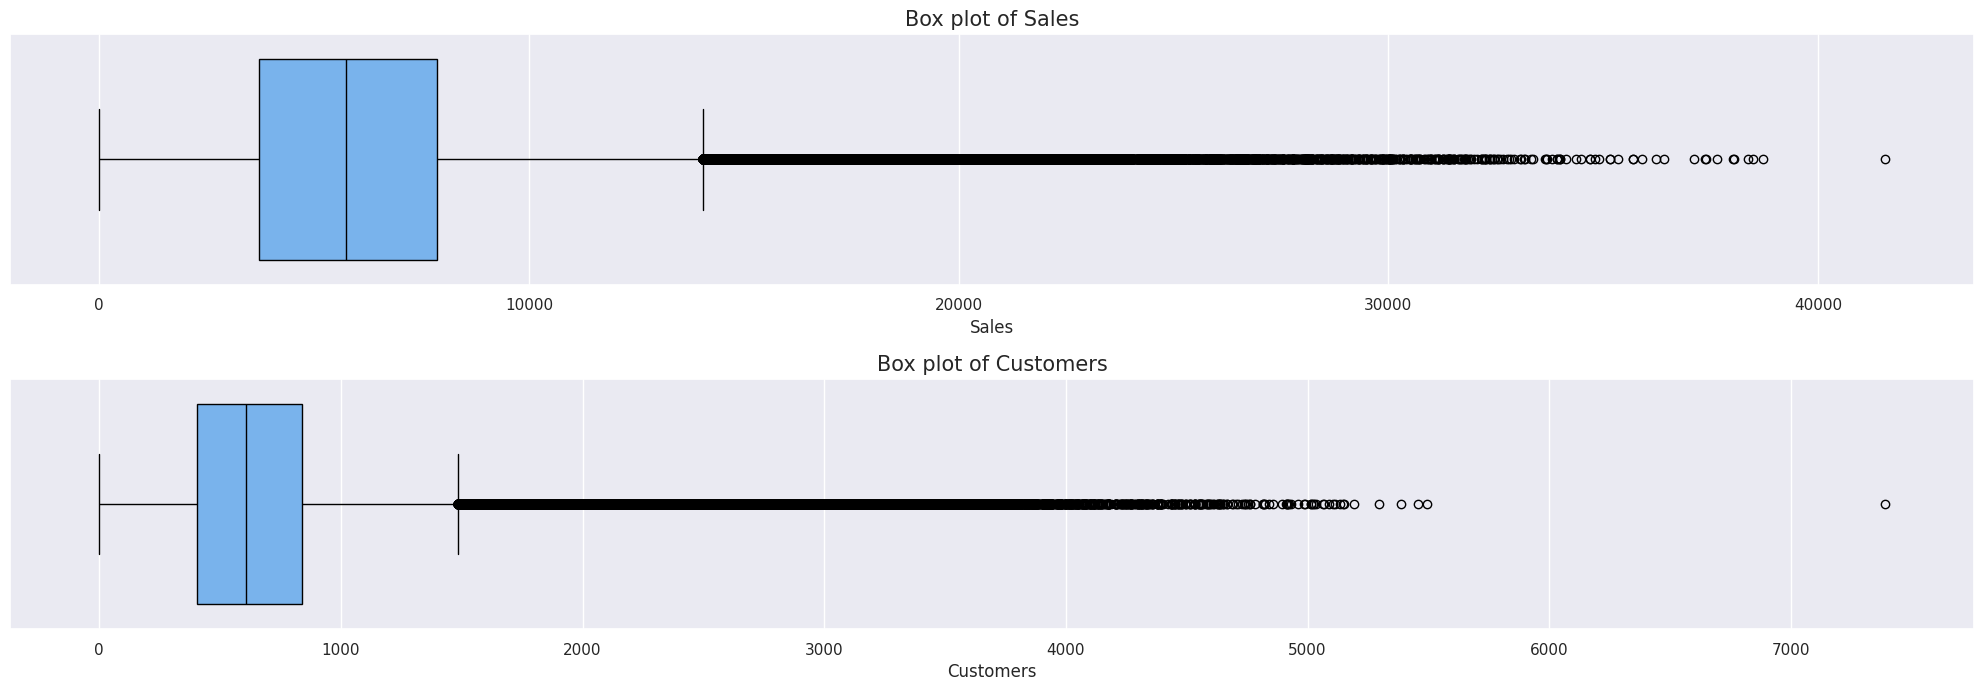

In [26]:
# Outliers in Sales and Customers
cols = ['Sales','Customers']
plt.figure(figsize=(20,10))
for i in range(len(cols)):
  plt.subplot(3,1,i+1)
  sns.boxplot(sales_data[cols[i]],orient = 'h',color='#66b3ff',linecolor = 'black')
  plt.title('Box plot of '+cols[i],fontdict={'fontsize':15})
plt.tight_layout()
plt.show()

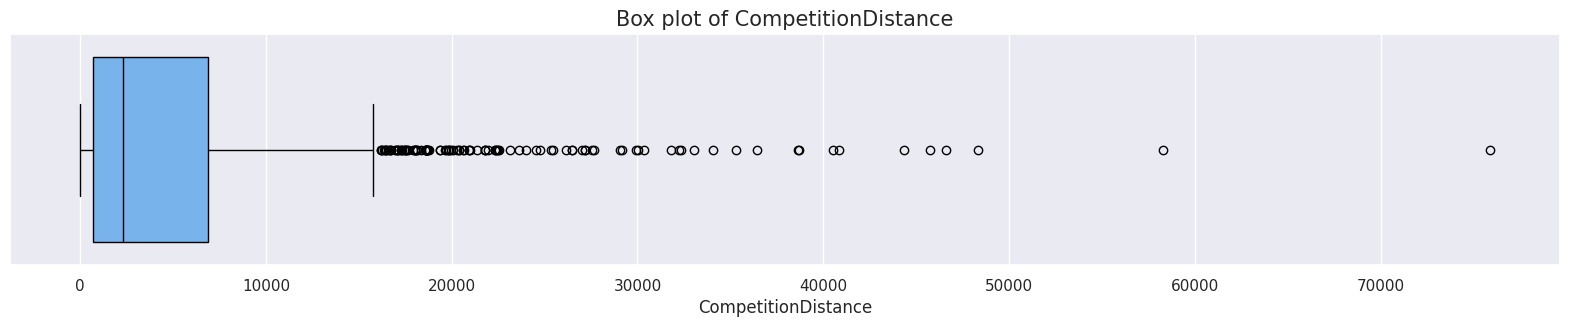

In [27]:
# Outliers in CompetitionDistance
plt.figure(figsize=(20,3))
sns.boxplot(stores_data['CompetitionDistance'],orient = 'h',color='#66b3ff',linecolor = 'black')
plt.title('Box plot of CompetitionDistance',fontdict={'fontsize':15})
plt.show()

Customers, Sales and CompetitionDistance has significant amount of outliers

## Data Preparation

In [28]:
def preprocess_eda(x,y):
  x['Date'] = pd.to_datetime(x['Date']) #Converting 'Date' column from object to datetime datatype
  x['Year'] = x['Date'].dt.year         #Extracting Day, Month, WeekOfYear and Year from the Date column and creating new columns
  x['Month'] = x['Date'].dt.month
  x['Day'] = x['Date'].dt.day
  x['WeekOfYear'] = x['Date'].apply(lambda i: i.weekofyear)
  x = x[['Store','Date', 'Year', 'Month', 'Day','DayOfWeek', 'WeekOfYear','Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday']] #rearranging the dataframe
  x['StateHoliday'] = x['StateHoliday'].map({0:0,'0':0,'a':1,'b':1,'c':1}) #0 indicates No holiday and 1 indicates Holiday

  y['CompetitionDistance'] = y['CompetitionDistance'].fillna(y['CompetitionDistance'].median()) #imputing missing values with median
  y['CompetitionDistance'] = y['CompetitionDistance'].astype('int')                             #converting column to integer datatype

  return x,y #returning the datasets

In [29]:
sales_data, stores_data = preprocess_eda(sales_data, stores_data) #function call

In [30]:
sales_data['Date'].min() #minimum value of date in our dataset

Timestamp('2013-01-01 00:00:00')

In [31]:
sales_data['Date'].max() #maximum value of date in our dataset

Timestamp('2015-07-31 00:00:00')

We can see that we have sales data for 3 years

## Exploratory Data Analysis (EDA)

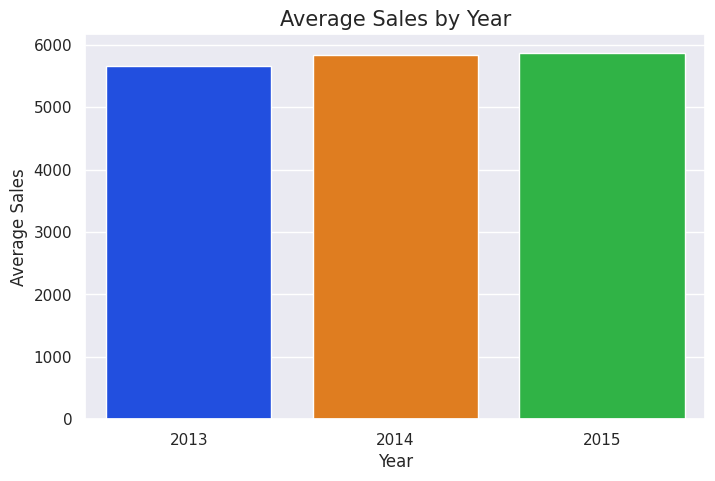

In [33]:
#Average Sales by year
plt.figure(figsize=(8,5))
avg_sales_by_year = sales_data.groupby('Year')['Sales'].mean().sort_index()
sns.barplot(x = avg_sales_by_year.index, y = avg_sales_by_year.values, palette = 'bright')
plt.title('Average Sales by Year', fontdict = {'fontsize': 15})
plt.xlabel('Year')
plt.ylabel('Average Sales')
plt.show()

There is not much big of a difference in the average sales for the three years

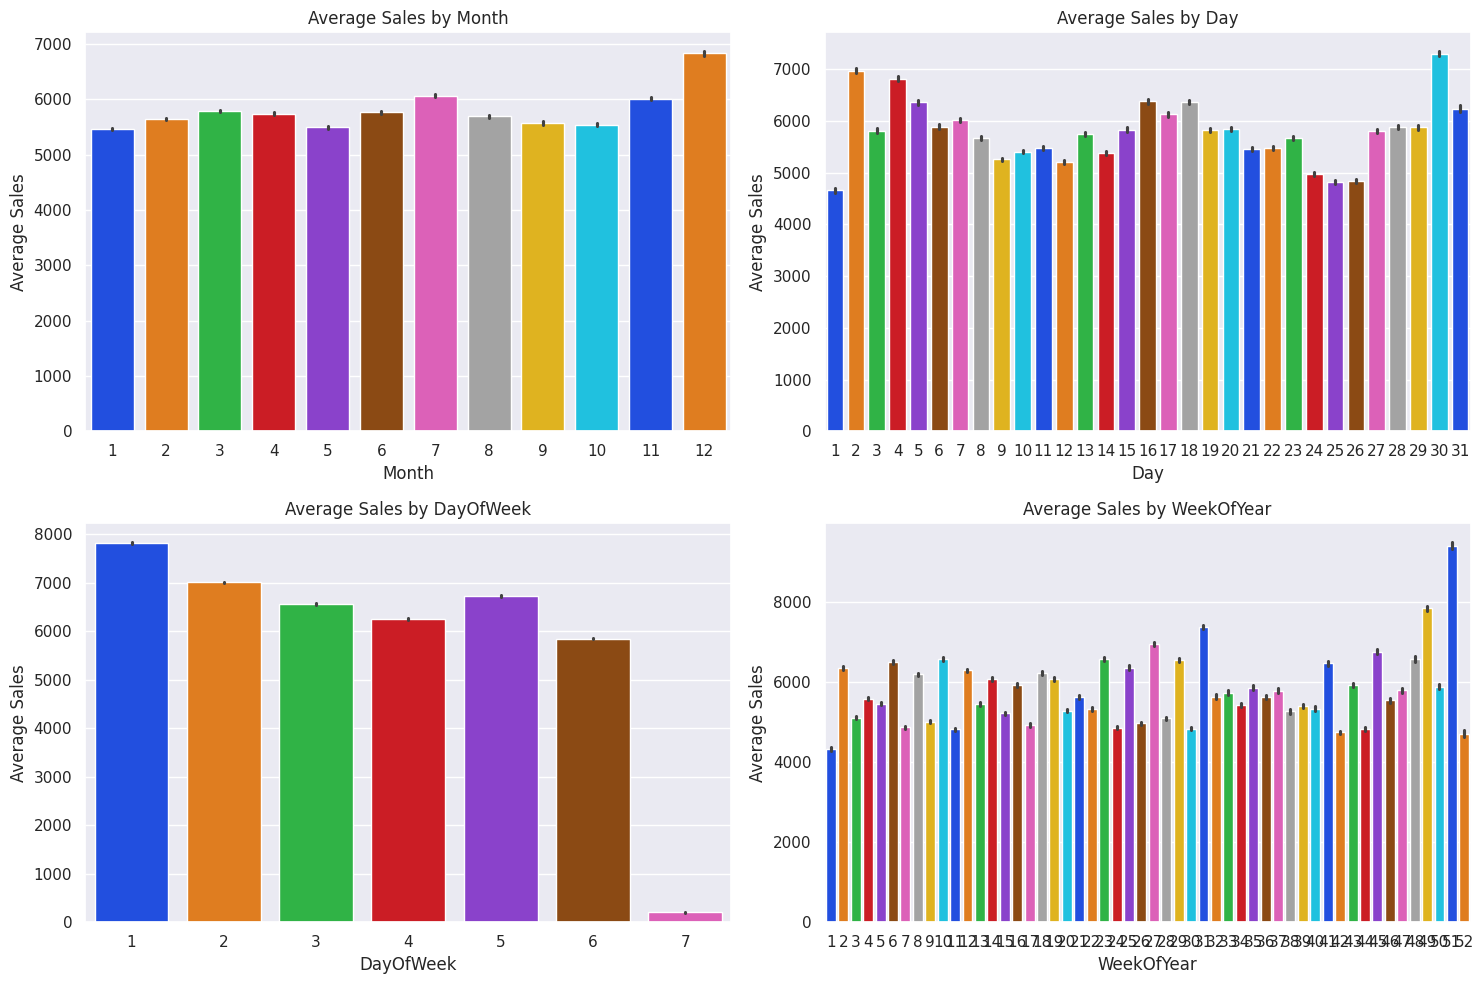

In [34]:
#Study of Sales overtime
cols = ['Month', 'Day','DayOfWeek', 'WeekOfYear']
fig = plt.subplots(nrows=2,ncols=2,figsize = (15,10))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    ax = sns.barplot(data = sales_data,x = cols[i],y = 'Sales',palette='bright')
    plt.title('Average Sales by '+cols[i])
    plt.xlabel(cols[i])
    plt.ylabel('Average Sales')
    plt.tight_layout()

Average monthly sales analysis tells us that the sales is high during the last month of the year and it can also be confirmed by the 'WeekOfYear' analysis. Sales is high in the 51st week, December month i.e during Christmas eve.

Sales is high during the start and end of the month

Less sales on Sundays as most stores are closed. Sales are high on Mondays when compared to other days in DayOfWeek.

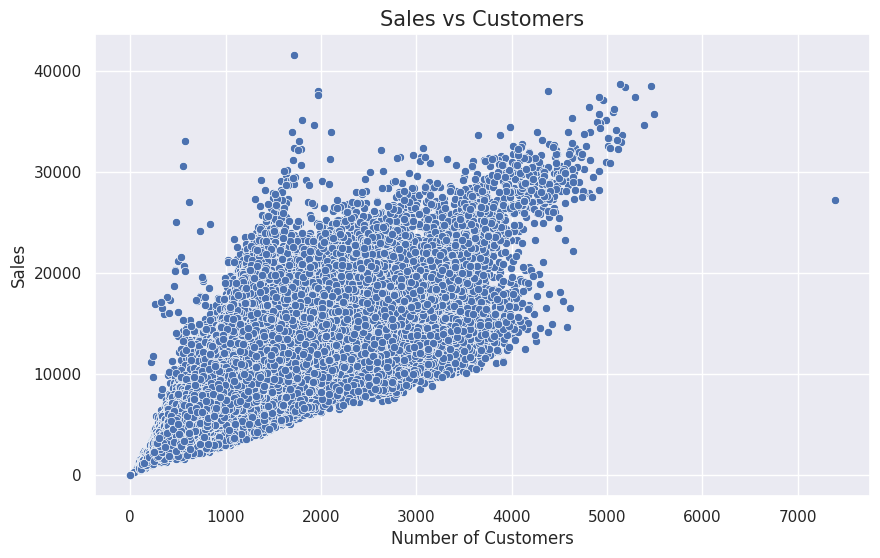

In [35]:
#Relationship between Sales and Customers
plt.figure(figsize=(10,6))
sns.scatterplot(x=sales_data['Customers'], y = sales_data['Sales'])
plt.title('Sales vs Customers', fontdict = {'fontsize': 15})
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

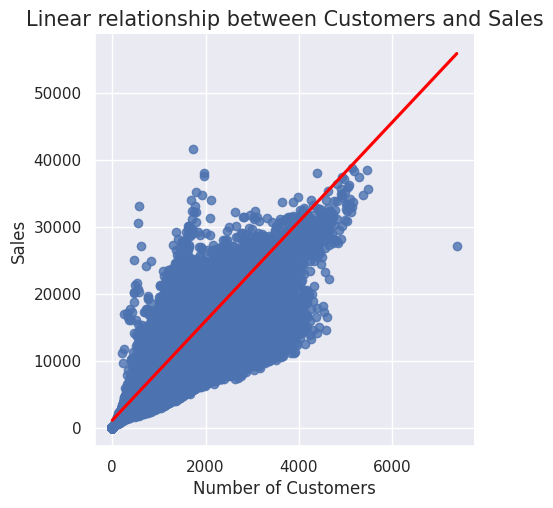

In [36]:
#Linear relationship between Customers and Sales
sns.lmplot(sales_data, x = 'Customers', y = 'Sales',line_kws={'color':'red'}, x_jitter=1, y_jitter=1)
plt.title('Linear relationship between Customers and Sales', fontdict = {'fontsize': 15})
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

Customers have a significant impact on sales. Sales increases with increase in Customers

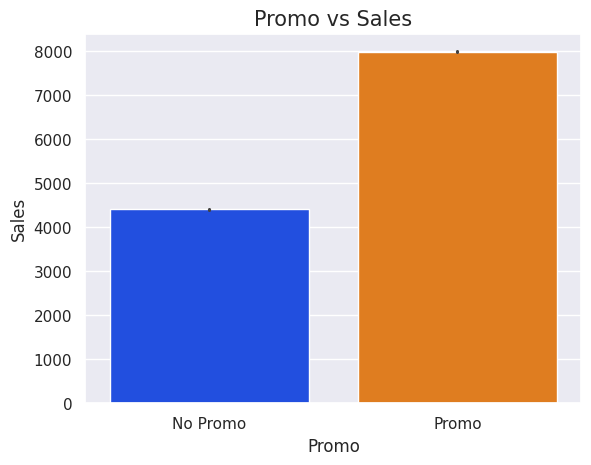

In [37]:
# Impact of promo on Sales
sns.barplot(sales_data,x = 'Promo', y = 'Sales', palette = 'bright')
plt.xticks(ticks = [0,1],labels = ['No Promo','Promo'])
plt.title('Promo vs Sales', fontdict = {'fontsize': 15})
plt.xlabel('Promo')
plt.ylabel('Sales')
plt.show()

Promo has a signifacnt impact on the sales. When promo is running we could see the sales is almost doubled when compared to when promo is not.

In [38]:
#Impact of School holiday on Sales
school_sales = sales_data.groupby('SchoolHoliday').agg({'Sales':'mean'}).values.flatten()
school_val_counts = sales_data['SchoolHoliday'].value_counts(normalize=True).values
labels=['Not Holiday','Holiday']
colors = ['violet','orange']

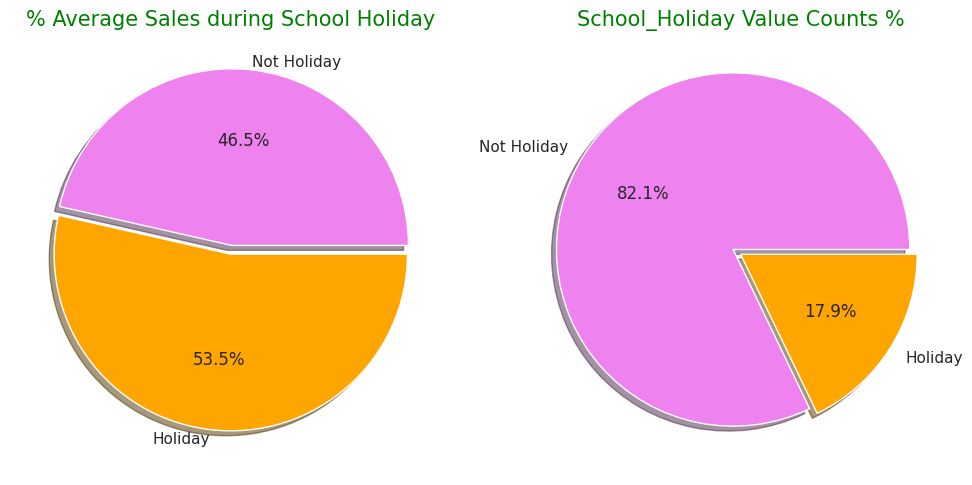

In [39]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.pie(school_sales,explode = [0.05,0],autopct = '%.1f%%', labels = labels, colors=colors,labeldistance=1.05,shadow = True)
plt.title('% Average Sales during School Holiday',fontdict = {'fontsize':15},color = 'green')
plt.subplot(1,2,2)
plt.pie(school_val_counts,explode = [0.05,0],autopct = '%.1f%%', labels = labels, colors=colors,shadow = True)
plt.title('School_Holiday Value Counts %',fontdict = {'fontsize':15},color = 'green')
plt.tight_layout()
plt.show()

Sales during school holidays are high when compared to other days

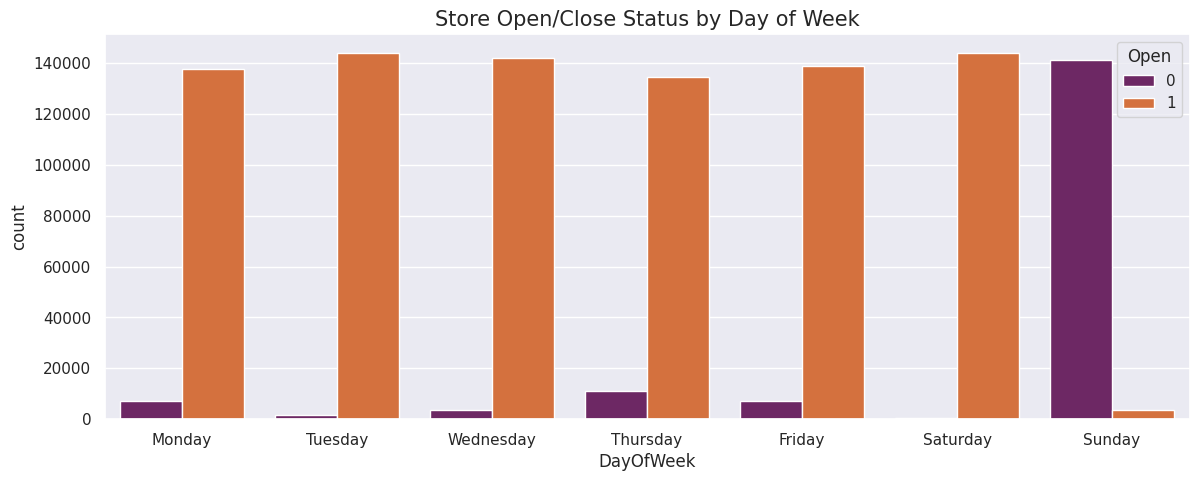

In [40]:
# Study of 'Open' feature
plt.figure(figsize=(14,5))
sns.countplot(sales_data, hue = 'Open', x = 'DayOfWeek',palette = 'inferno')
plt.xticks(ticks = np.array(range(7)),labels = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])
plt.title('Store Open/Close Status by Day of Week', fontdict = {'fontsize': 15})
plt.show()

We can see that most of the stores are closed on Sunday

In [41]:
#Impact of StateHoliday on Sales
statehol_sales = sales_data.groupby('StateHoliday').agg({'Sales':'mean'}).values.flatten()
statehol_val_counts = sales_data['StateHoliday'].value_counts(normalize=True).values
labels=['Not Holiday','Holiday']
colors = ['violet','orange']

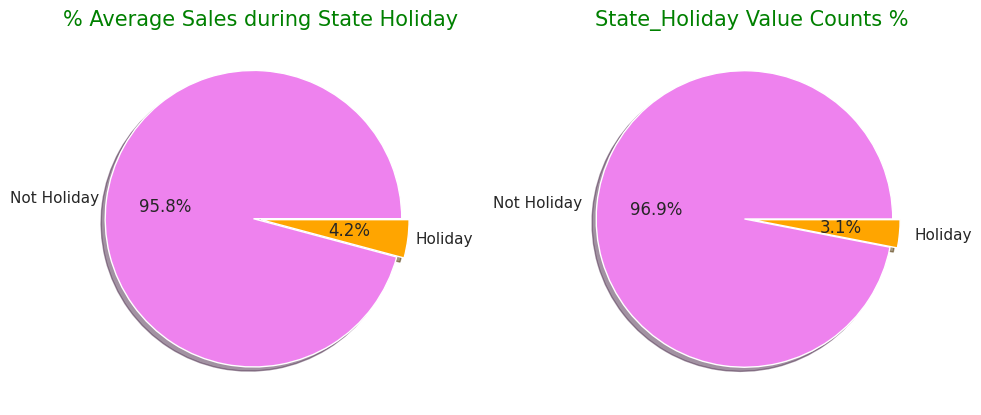

In [42]:
plt.figure(figsize = (10,5))
plt.subplot(1,2,1)
plt.pie(statehol_sales,explode = [0.05,0],autopct = '%.1f%%', labels = labels, colors=colors,labeldistance=1.05,shadow = True)
plt.title('% Average Sales during State Holiday',fontdict = {'fontsize':15},color = 'green')
plt.subplot(1,2,2)
plt.pie(statehol_val_counts,explode = [0.05,0],autopct = '%.1f%%', labels = labels, colors=colors,shadow = True)
plt.title('State_Holiday Value Counts %',fontdict = {'fontsize':15},color = 'green')
plt.tight_layout()
plt.show()

Sales are not much affected by Stateholidays as most stores are closed on Stateholidays

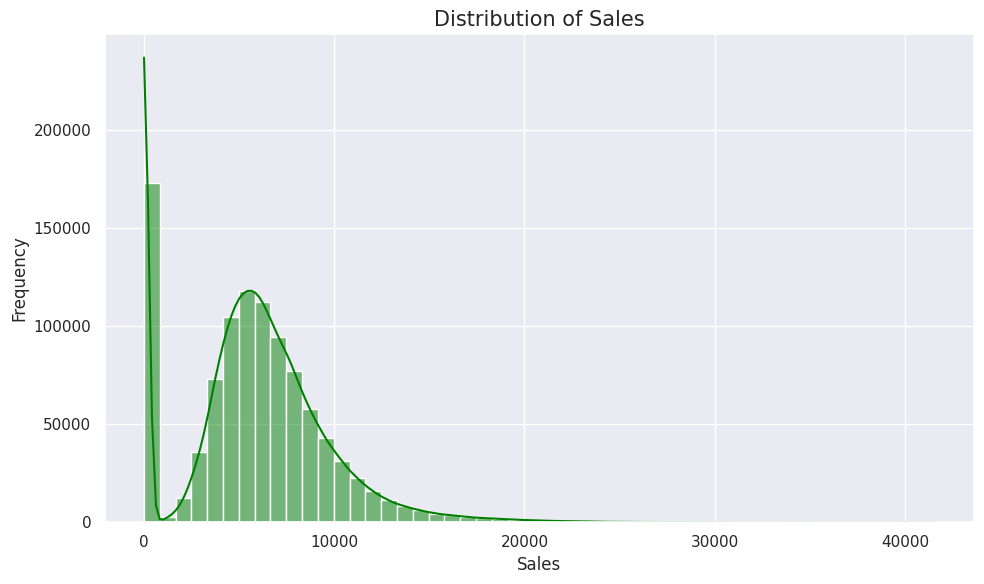

In [43]:
# Distribution of sales
plt.figure(figsize=(10,6))
sns.histplot(sales_data['Sales'],bins = 50, kde = True,color = 'green')
plt.title('Distribution of Sales',fontdict={'fontsize':15})
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

We can see a peak at 0 in the histogram as the store is closed mostly which indicates 0 sales. We have a normal distribution of sales with right skewed data.

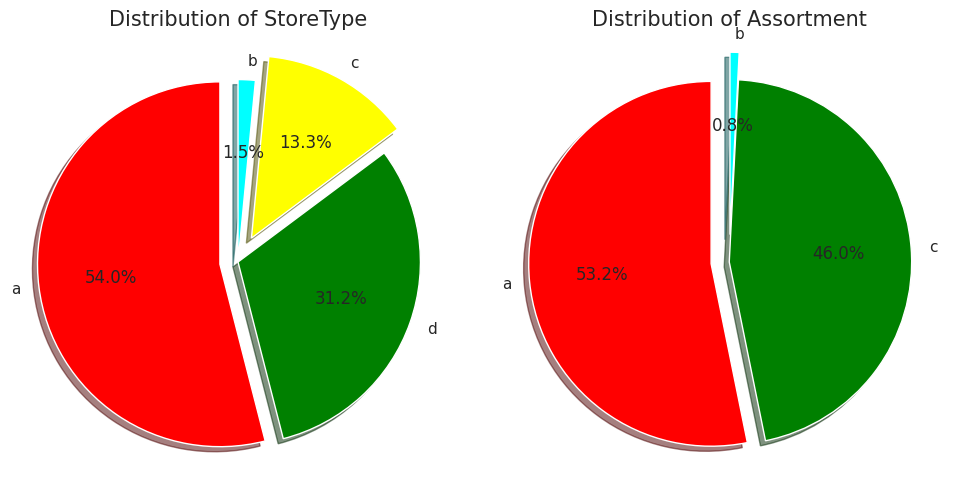

In [44]:
# Distribution of Storetype and Assortment
cols = ['StoreType','Assortment']
plt.subplots(nrows=1, ncols = 2, figsize=(10,5))
for i in range(len(cols)):
  values = stores_data[cols[i]].value_counts().values
  types = stores_data[cols[i]].value_counts().index
  explode = {0:[0.1,0.0,0.15,0.0],1:[0.1,0.0,0.15]}
  colours = {0:['red','green','yellow','cyan'],1:['red','green','cyan']}
  plt.subplot(1,2,i+1)
  plt.pie(values, labels = types, autopct = '%.1f%%',explode = explode[i], shadow = True, colors = colours[i],startangle=90)
  plt.title('Distribution of '+cols[i],fontdict={'fontsize':15})
plt.tight_layout()
plt.show()

Store type 'a' are the highest in number with storetype 'b' being the lowest. Large number of stores are under Assortment 'a'.

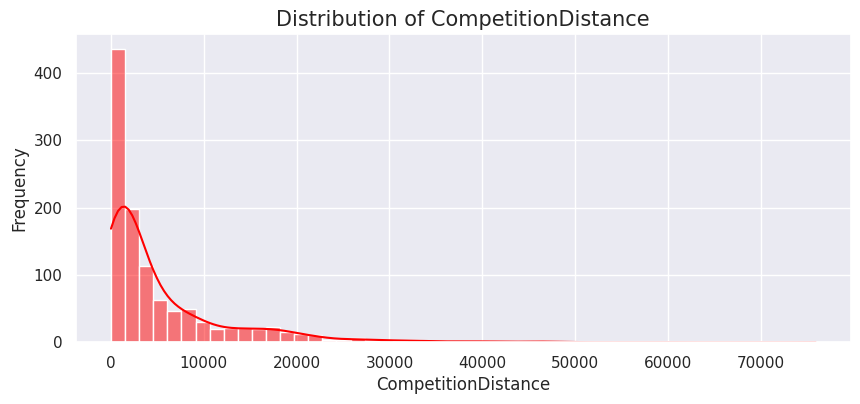

In [45]:
# Distribution of CompetitionDistance
plt.figure(figsize=(10,4))
sns.histplot(stores_data['CompetitionDistance'],bins = 50, kde = True,color = 'red')
plt.title('Distribution of CompetitionDistance',fontdict={'fontsize':15})
plt.xlabel('CompetitionDistance')
plt.ylabel('Frequency')
plt.show()

The data is right skewed. Most of the competition stores are within close range to each other

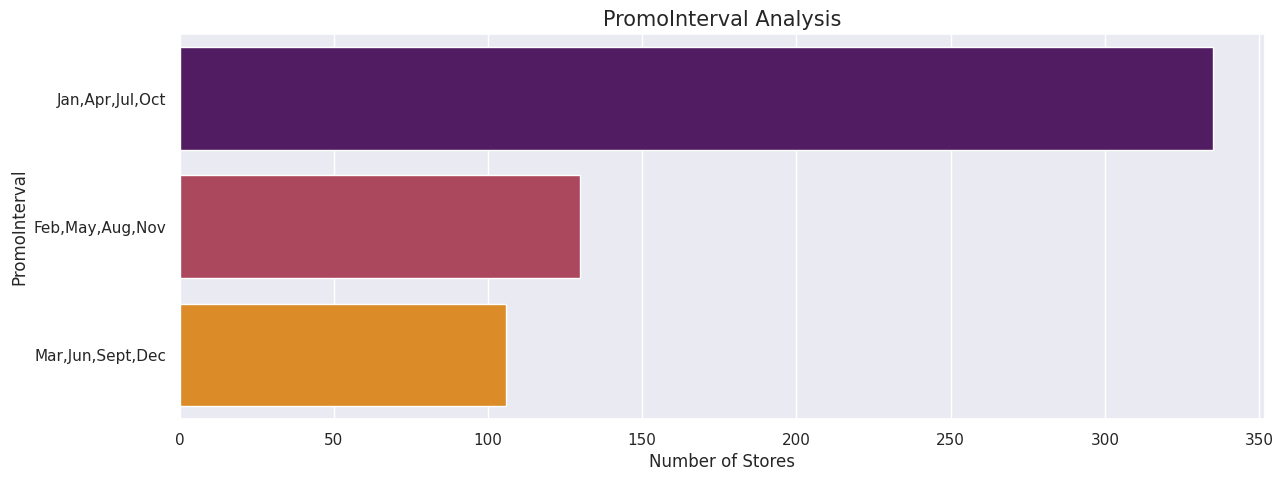

In [46]:
# PromoInterval Analysis
plt.figure(figsize=(14,5))
sns.countplot(stores_data, y = 'PromoInterval',orient = 'h',palette = 'inferno')
plt.title('PromoInterval Analysis', fontdict = {'fontsize': 15})
plt.xlabel('Number of Stores')
plt.ylabel('PromoInterval')
plt.show()

Almost 49% of the data is missing in PromoInterval feature. Among the remaining stores, many stores start their Promo2 in Jan,Apr,Jul,Oct cycle.

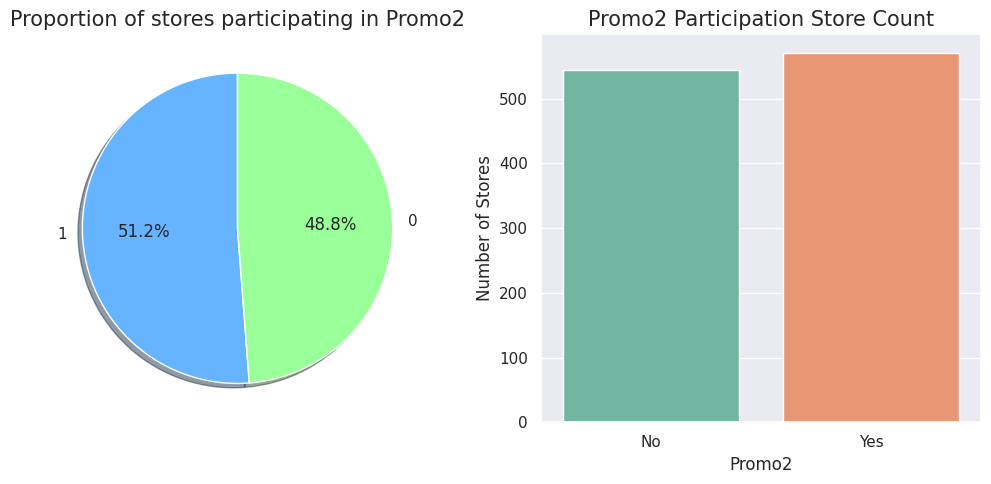

In [47]:
# Promo2 Participation
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
promo2_counts = stores_data['Promo2'].value_counts()
plt.pie(promo2_counts, labels =promo2_counts.index, autopct = '%.1f%%', shadow = True, startangle = 90, colors = ['#66b3ff','#99ff99'])
plt.title('Proportion of stores participating in Promo2',fontdict = {'fontsize': 15})
plt.subplot(1,2,2)
sns.countplot(stores_data,x = 'Promo2', palette = 'Set2')
plt.xticks(ticks = [0,1],labels = ['No','Yes'])
plt.title('Promo2 Participation Store Count', fontdict = {'fontsize': 15})
plt.xlabel('Promo2')
plt.ylabel('Number of Stores')
plt.tight_layout()
plt.show()

The number of stores that participates in the Promo2 is slightly higher than that of the ones that do not participate

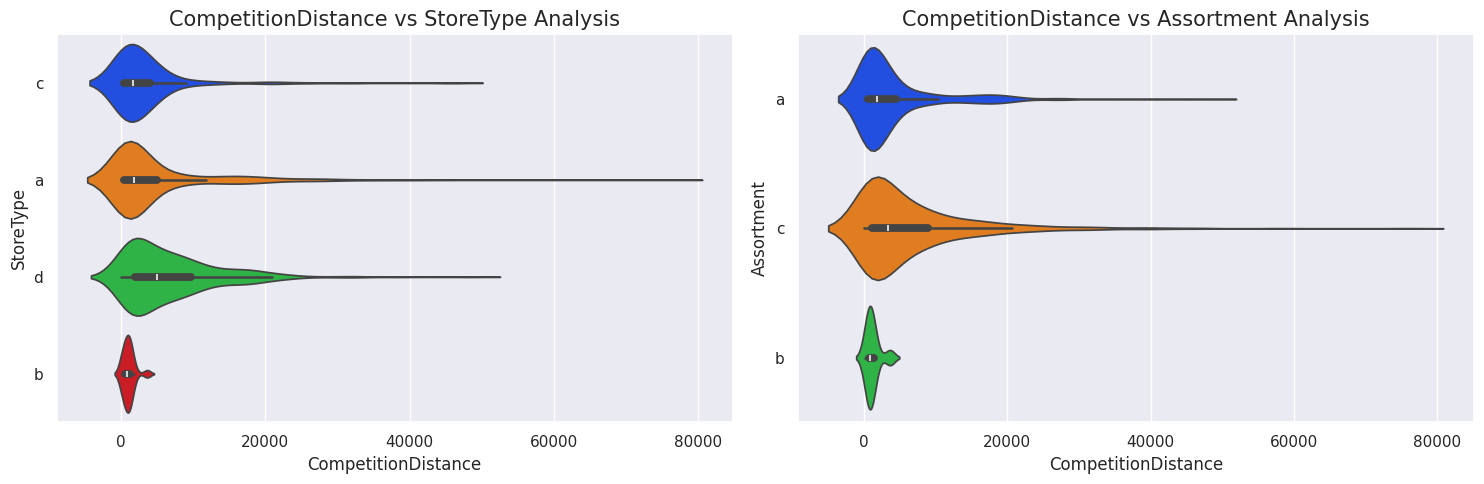

In [48]:
# CompetitionDistance vs StoreType and Assortment Analysis
fts = ['StoreType','Assortment']
plt.subplots(nrows=1, ncols = 2, figsize=(15,5))
for i in range(len(fts)):
  plt.subplot(1,2,i+1)
  sns.violinplot(stores_data, y =fts[i] ,x = 'CompetitionDistance',orient = 'h',palette = 'bright')
  plt.title('CompetitionDistance vs '+fts[i]+' Analysis', fontdict = {'fontsize': 15})
  plt.xlabel('CompetitionDistance')
  plt.ylabel(fts[i])
plt.tight_layout()
plt.show()

Stores under StoreType 'b' and Assortment 'b' are close to each than other types of stores.

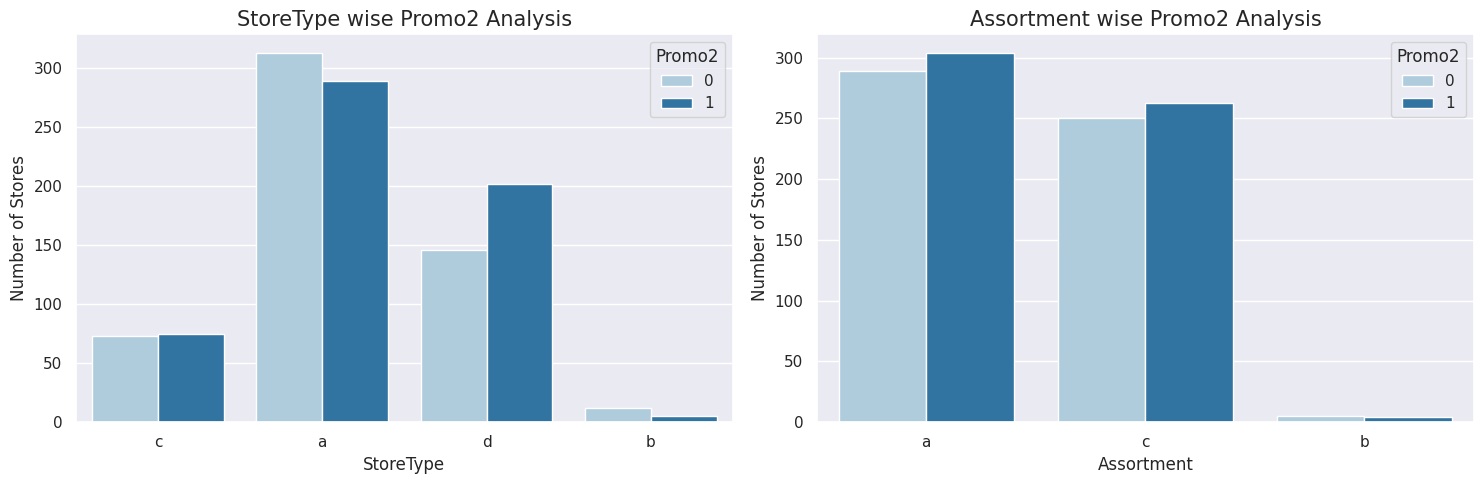

In [49]:
# Promo2 vs StoreType and Assortment Analysis
fts = ['StoreType','Assortment']
plt.subplots(nrows=1, ncols = 2, figsize=(15,5))
for i in range(len(fts)):
  plt.subplot(1,2,i+1)
  sns.countplot(stores_data, x =fts[i] ,hue = 'Promo2',palette = 'Paired')
  plt.title(fts[i]+' wise Promo2 Analysis', fontdict = {'fontsize': 15})
  plt.ylabel('Number of Stores')
  plt.xlabel(fts[i])
plt.tight_layout()
plt.show()

Number of stores under storetype 'a' is higher than others, but it has less stores that run Promo2 than which doesn't. But stores that run Promo2 are higher in Assortment 'a'.

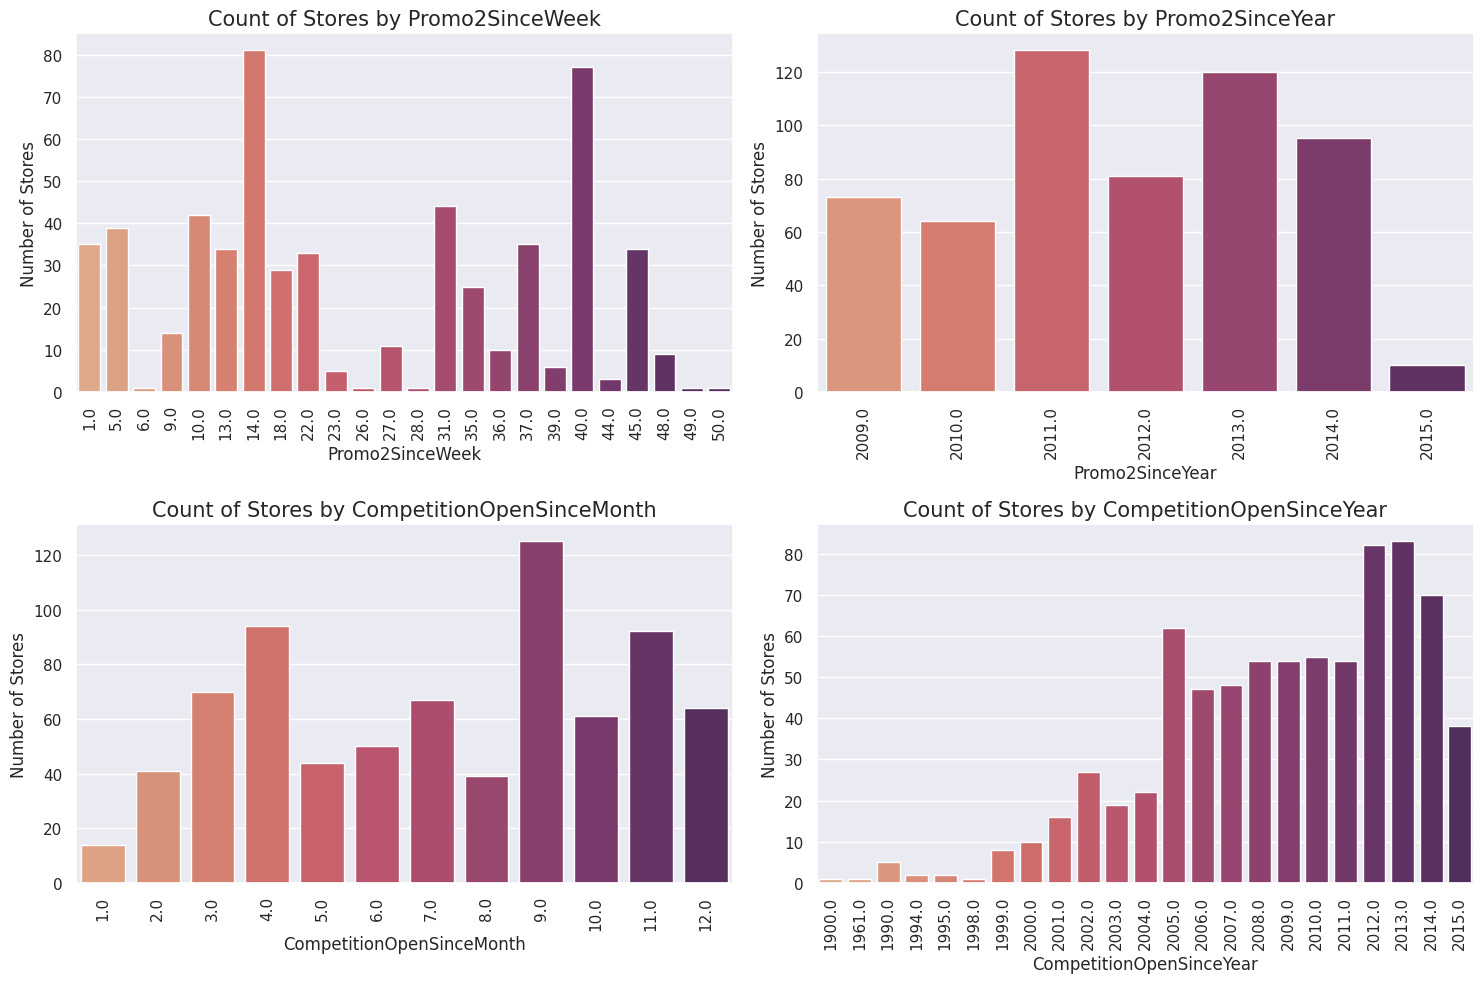

In [50]:
# Promo2 Start Year and Week Analysis
promo2since = ['Promo2SinceWeek','Promo2SinceYear','CompetitionOpenSinceMonth','CompetitionOpenSinceYear' ]
plt.subplots(nrows=2, ncols = 2, figsize=(15,10))
for i in range(len(promo2since)):
  plt.subplot(2,2,i+1)
  sns.countplot(stores_data, x =promo2since[i],palette = 'flare')
  plt.title('Count of Stores by '+promo2since[i], fontdict = {'fontsize': 15})
  plt.xlabel(promo2since[i])
  plt.ylabel('Number of Stores')
  plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Competition stores have been in raise since 1999 and there is a gradual increase every year till 2013. Then the competition stores seems to have fallen drop.

In [51]:
# Creating a function to merge sales and stores data
def merge(x,y):
  return pd.merge(x,y, on = 'Store', how = 'inner')

In [52]:
data = merge(sales_data,stores_data) #merging sales and stores data

In [53]:
print('Shape of the merged data is',data.shape)

Shape of the merged data is (1017209, 22)


### Merged data analysis

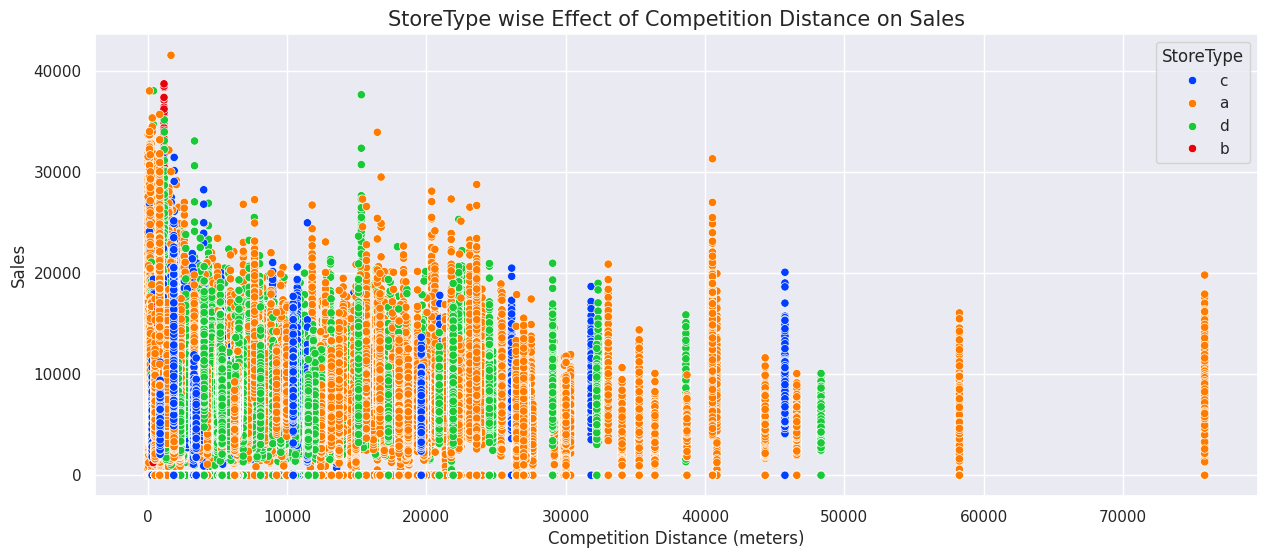

In [54]:
#Effect of Competition Distance on Sales
plt.figure(figsize=(15,6))
sns.scatterplot(x='CompetitionDistance',y = 'Sales', data = data, hue = 'StoreType', palette = 'bright')
plt.title('StoreType wise Effect of Competition Distance on Sales', fontdict = {'fontsize': 15})
plt.xlabel('Competition Distance (meters)')
plt.ylabel('Sales')
plt.legend(title = 'StoreType')
plt.show()

Competition Distance vs Sales shows that the sales is high when the competition distance is less and StoreType ‘a’ has the larger number of sales as well.

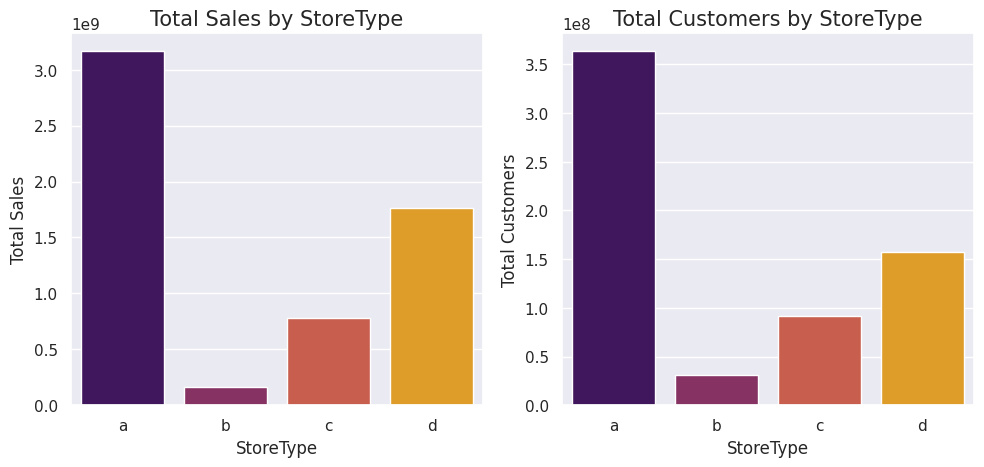

In [55]:
# Total Sales and Customers by StoreType
vals = ['Sales','Customers']
plt.subplots(nrows=1, ncols = 2, figsize=(10,5))
for i in range(len(vals)):
  plt.subplot(1,2,i+1)
  sns.barplot(x = data.groupby('StoreType')[vals[i]].sum().index, y =data.groupby('StoreType')[vals[i]].sum().values,palette = 'inferno')
  plt.title('Total '+vals[i]+' by StoreType', fontdict = {'fontsize': 15})
  plt.xlabel('StoreType')
  plt.ylabel('Total '+vals[i])
plt.tight_layout()
plt.show()

Total sales and customers in storetype 'a' is higher than other storetypes.

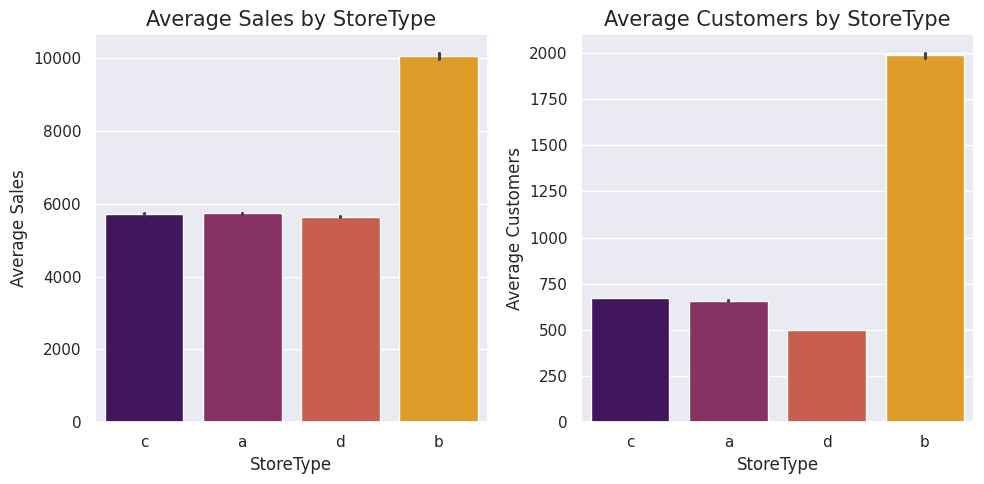

In [56]:
# Average Sales and Customers by StoreType
vals = ['Sales','Customers']
plt.subplots(nrows=1, ncols = 2, figsize=(10,5))
for i in range(len(vals)):
  plt.subplot(1,2,i+1)
  sns.barplot(x = data['StoreType'], y =data[vals[i]],palette = 'inferno')
  plt.title('Average '+vals[i]+' by StoreType', fontdict = {'fontsize': 15})
  plt.xlabel('StoreType')
  plt.ylabel('Average '+vals[i])
plt.tight_layout()
plt.show()

But the average spending of customers and average number of customers is high in StoreType 'b'

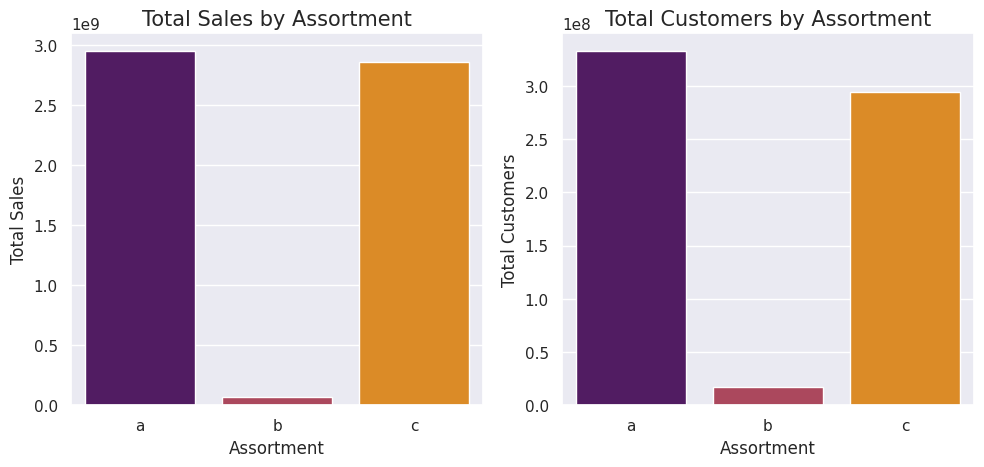

In [57]:
# Total Sales and Customers by Assortment
vals = ['Sales','Customers']
plt.subplots(nrows=1, ncols = 2, figsize=(10,5))
for i in range(len(vals)):
  plt.subplot(1,2,i+1)
  sns.barplot(x = data.groupby('Assortment')[vals[i]].sum().index, y =data.groupby('Assortment')[vals[i]].sum().values,palette = 'inferno')
  plt.title('Total '+vals[i]+' by Assortment', fontdict = {'fontsize': 15})
  plt.xlabel('Assortment')
  plt.ylabel('Total '+vals[i])
plt.tight_layout()
plt.show()

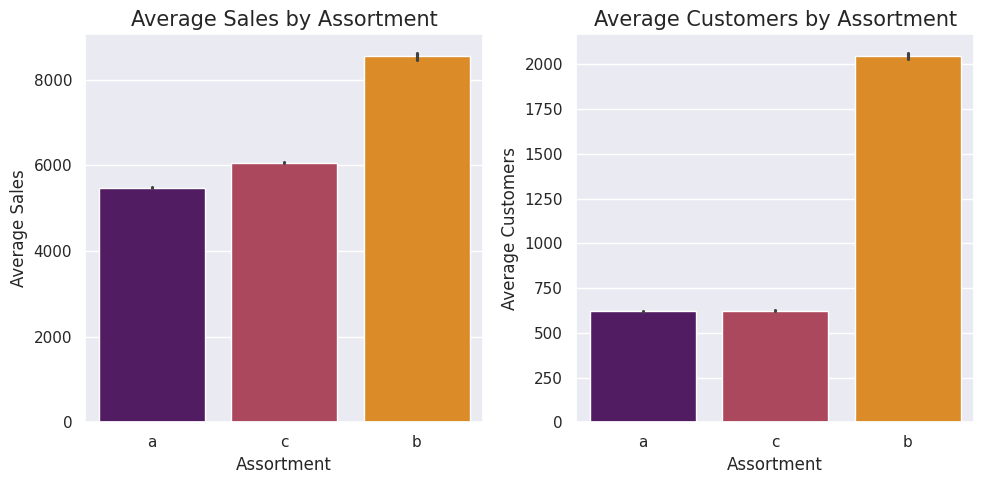

In [58]:
# Average Sales and Customers by Assortment
vals = ['Sales','Customers']
plt.subplots(nrows=1, ncols = 2, figsize=(10,5))
for i in range(len(vals)):
  plt.subplot(1,2,i+1)
  sns.barplot(x = data['Assortment'], y =data[vals[i]],palette = 'inferno')
  plt.title('Average '+vals[i]+' by Assortment', fontdict = {'fontsize': 15})
  plt.xlabel('Assortment')
  plt.ylabel('Average '+vals[i])
plt.tight_layout()
plt.show()

Total sales and customers in Assortment 'a' are higher but the average is higher in Assortment 'b'.

In [59]:
numerical_data = data.drop(['StoreType','Assortment','PromoInterval'],axis = 1)

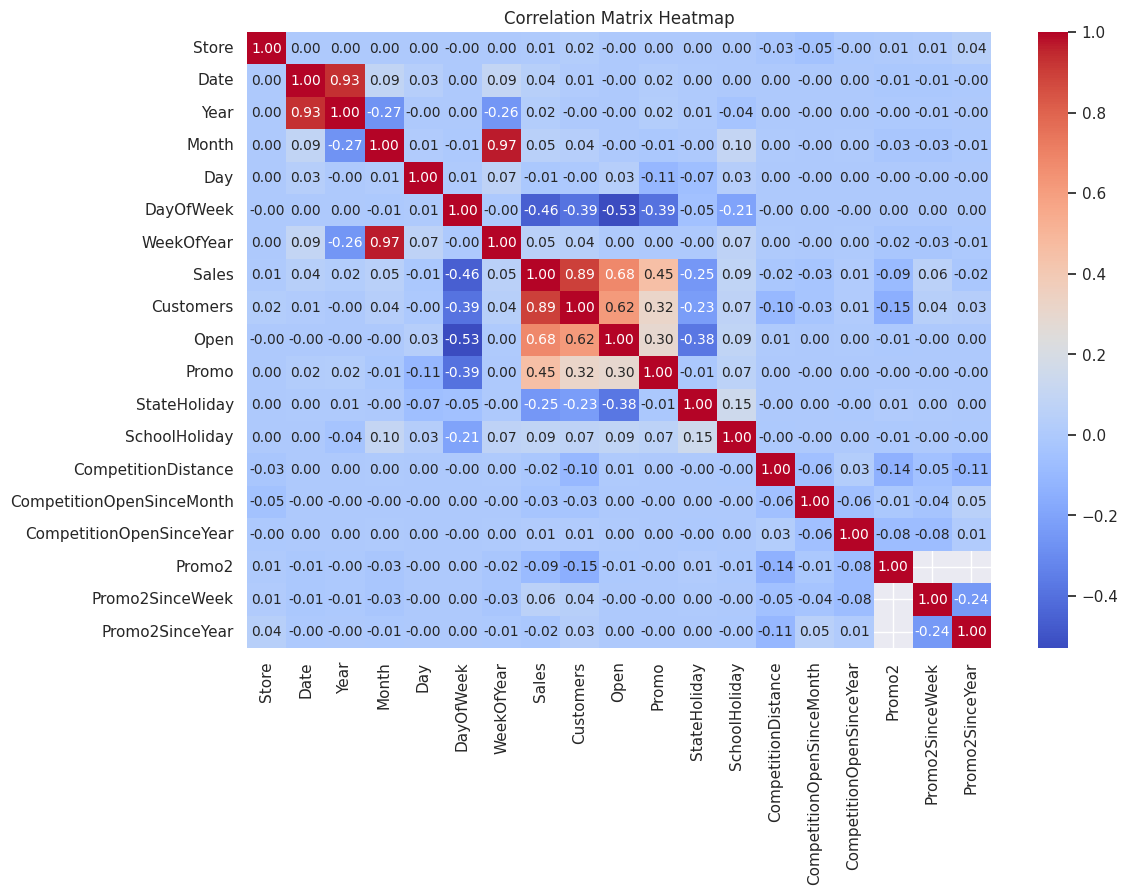

In [60]:
#Heatmap of correlations
plt.figure(figsize = (12,8))
sns.heatmap(numerical_data.corr(), annot = True, cmap ='coolwarm',fmt = '.2f',annot_kws={'size':10})
plt.title('Correlation Matrix Heatmap')
plt.show()

WeekOfYear,Month and Date,Year features are highly correlated with each other. Ignoring Customers,Sales as Sales is the target

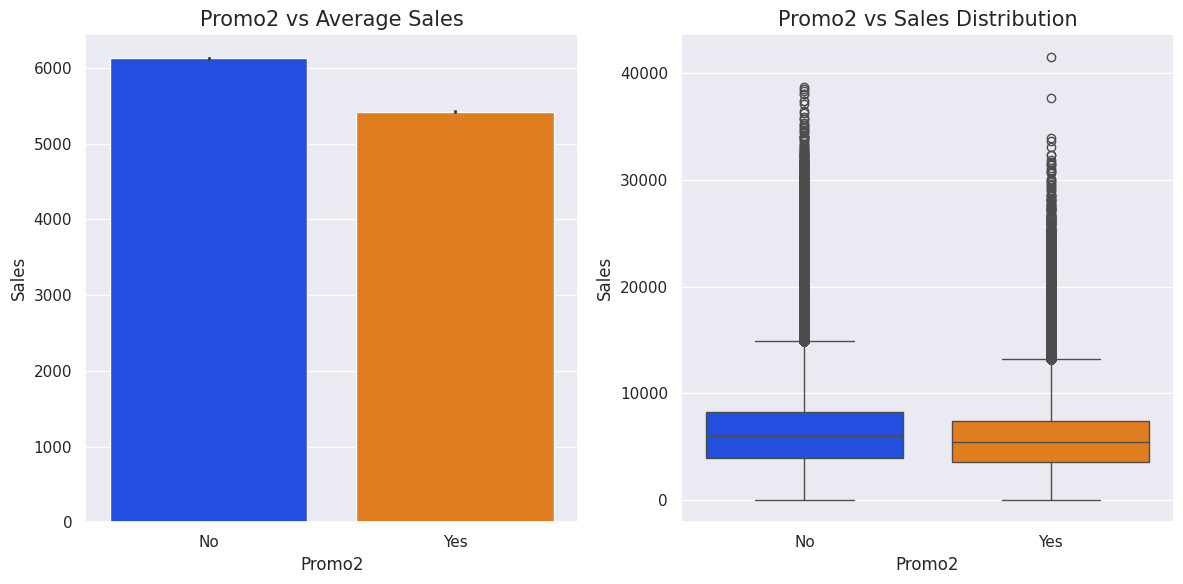

In [61]:
# Distribution and Impact of Promo2 on Sales
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.barplot(data,x = 'Promo2', y = 'Sales', palette = 'bright')
plt.xticks(ticks = [0,1],labels = ['No','Yes'])
plt.title('Promo2 vs Average Sales', fontdict = {'fontsize': 15})
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.subplot(1,2,2)
sns.boxplot(data,x = 'Promo2', y = 'Sales', palette = 'bright')
plt.xticks(ticks = [0,1],labels = ['No','Yes'])
plt.title('Promo2 vs Sales Distribution', fontdict = {'fontsize': 15})
plt.xlabel('Promo2')
plt.ylabel('Sales')
plt.tight_layout()
plt.show()

On an average, Promo2 generates less sales

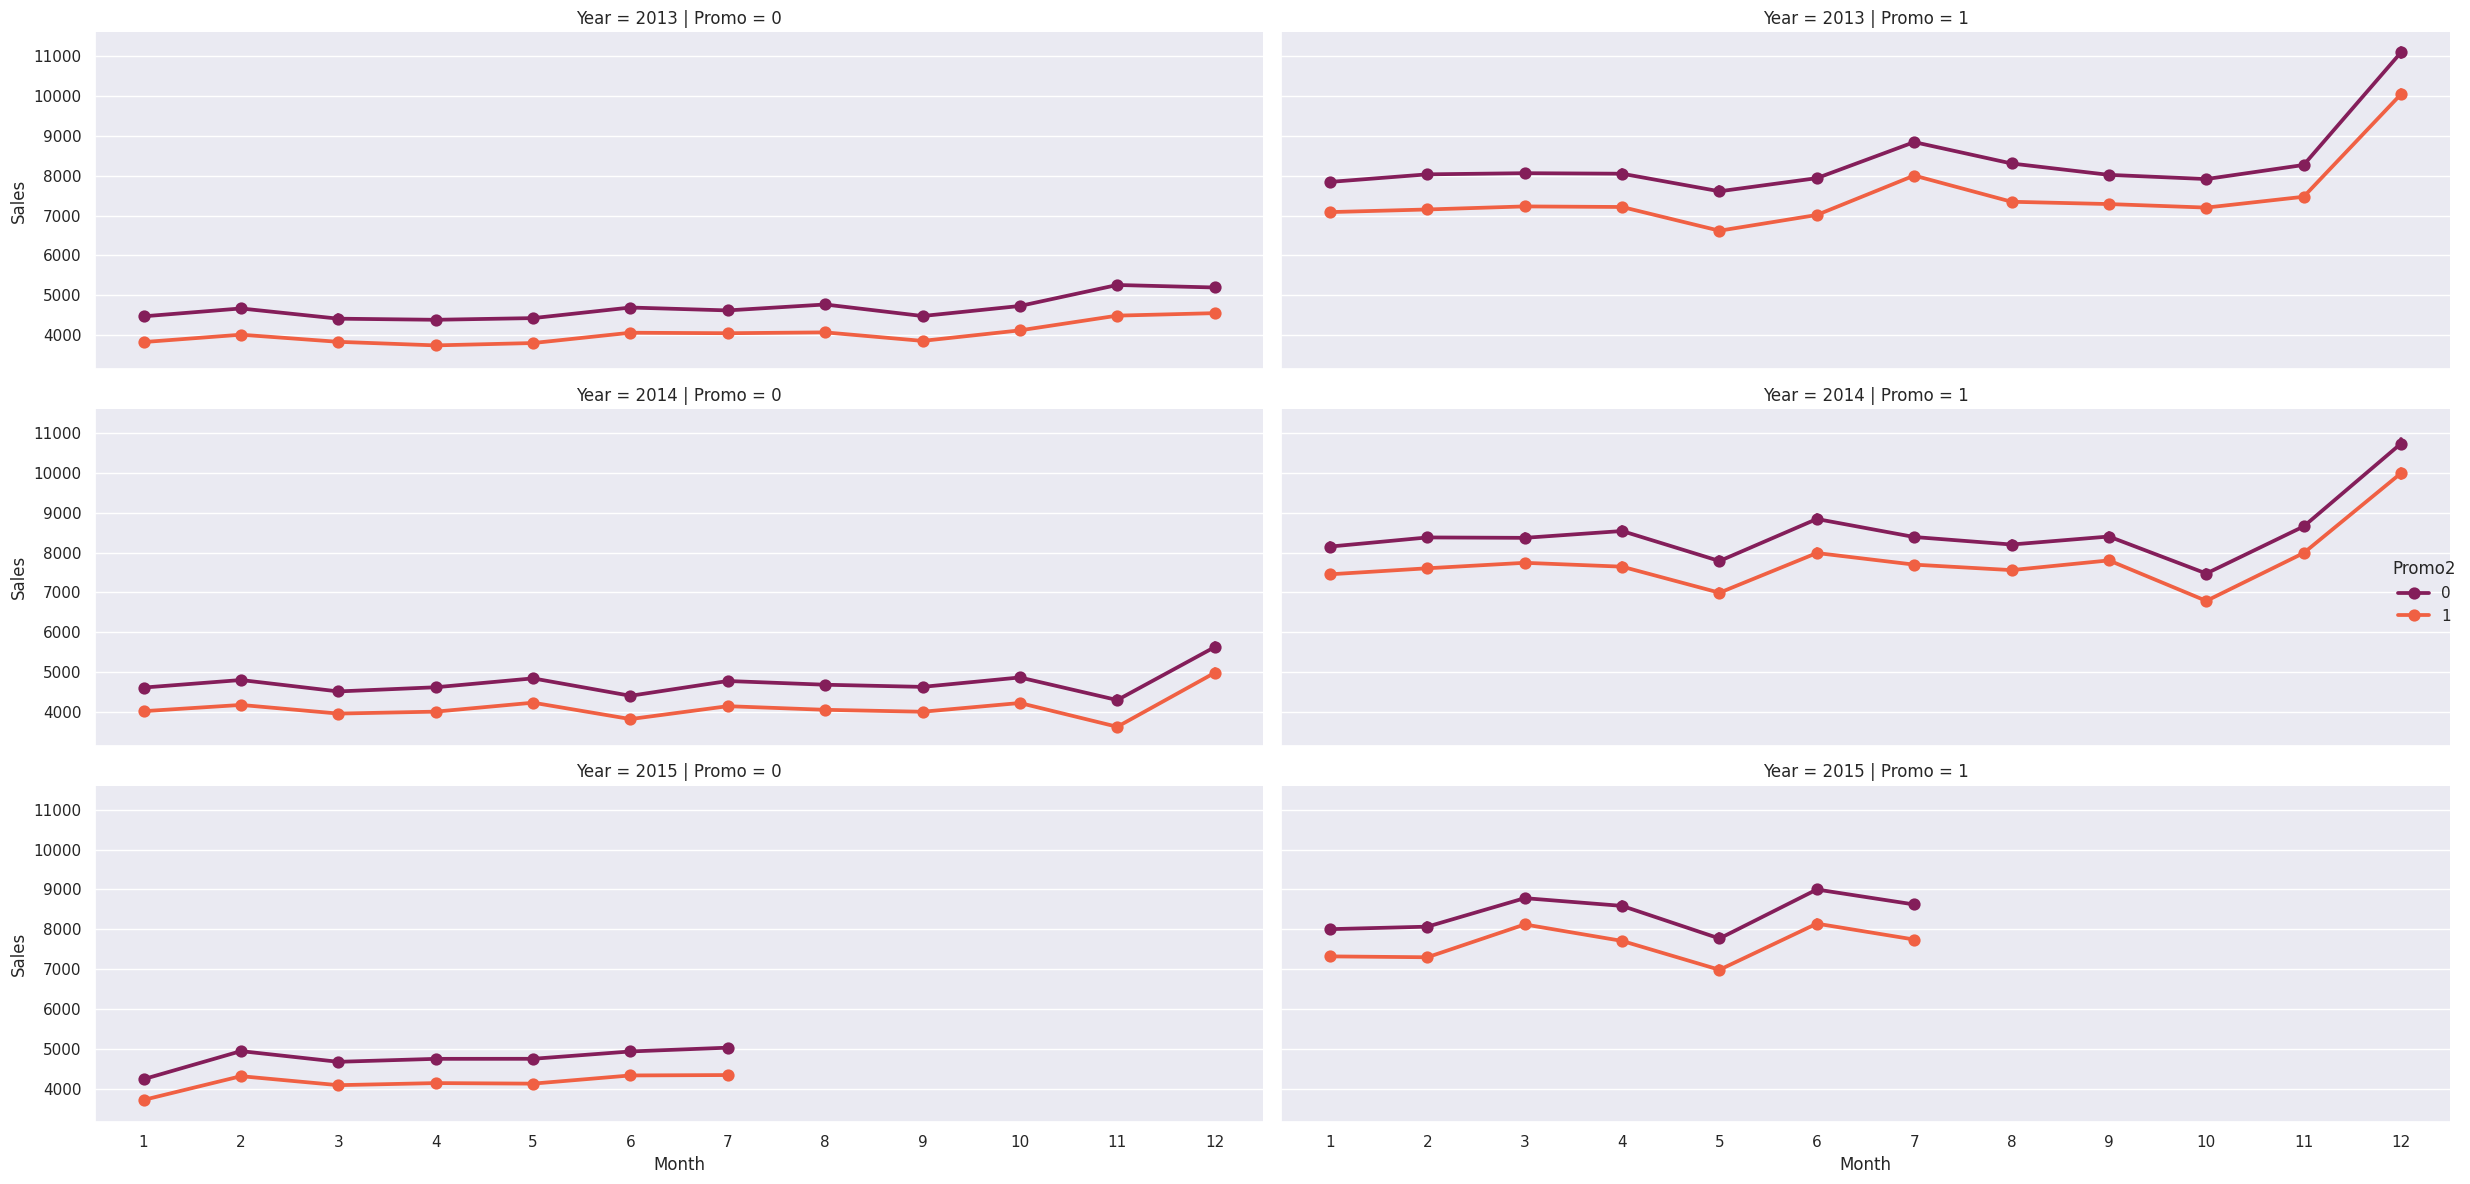

In [62]:
#Promo and Promo2 effect on Sales
sns.catplot(data, x = 'Month', y = 'Sales',row = 'Year',col = 'Promo', hue = 'Promo2', kind = 'point',palette = 'rocket',height=4, aspect = 3)
plt.tight_layout()
plt.show()

Sales are high when promo is running, but the sales during Promo2 is less when compared to Promo2 not running.

In [63]:
data.isnull().sum()/len(data)*100 #percentage of missing values in each feature

Store                         0.000000
Date                          0.000000
Year                          0.000000
Month                         0.000000
Day                           0.000000
DayOfWeek                     0.000000
WeekOfYear                    0.000000
Sales                         0.000000
Customers                     0.000000
Open                          0.000000
Promo                         0.000000
StateHoliday                  0.000000
SchoolHoliday                 0.000000
StoreType                     0.000000
Assortment                    0.000000
CompetitionDistance           0.000000
CompetitionOpenSinceMonth    31.787764
CompetitionOpenSinceYear     31.787764
Promo2                        0.000000
Promo2SinceWeek              49.943620
Promo2SinceYear              49.943620
PromoInterval                49.943620
dtype: float64

CompetitionOpenSinceMonth, CompetitionOpenSinceYear has around 32% missing data and Promo2SinceWeek,Promo2SinceYear,PromoInterval has around 50% of the data missing

In [64]:
data.head(2) #viewing the merged dataset.

Store       Date  Year  Month  Day  DayOfWeek  WeekOfYear  Sales  \
0      1 2015-07-31  2015      7   31          5          31   5263   
1      1 2015-07-30  2015      7   30          4          31   5020   

   Customers  Open  ...  SchoolHoliday  StoreType  Assortment  \
0        555     1  ...              1          c           a   
1        546     1  ...              1          c           a   

  CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
0                1270                       9.0                    2008.0   
1                1270                       9.0                    2008.0   

   Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
0       0              NaN              NaN            NaN  
1       0              NaN              NaN            NaN  

[2 rows x 22 columns]

As our dataset is huge, taking a sample of the dataset for model building

Taking a sample of 2lakh data from the total data. Among this 2lakh rows, 20% will be taken for validation and remaining 80% will be used as training data

To equally split data between stores, group the data by stores and distribute the data randomly.

Total No of rows of data needed from each store = 200000/1115(number of stores) = 179.37 == 180

In [136]:
sample_data = pd.DataFrame()

#grouping by store number
grouped = data.groupby('Store')

for store_no, store_data in grouped:
  #randomly selecting 180 rows for sample data
  sample = store_data.sample(n=180, random_state=42)
  sample_data = pd.concat([sample_data, sample])

print(len(sample_data))

200700


In [137]:
sample_data.head() #viewing the sample data

Store       Date  Year  Month  Day  DayOfWeek  WeekOfYear  Sales  \
334      1 2014-08-31  2014      8   31          7          35      0   
584      1 2013-12-24  2013     12   24          2          52   3204   
851      1 2013-04-01  2013      4    1          1          14      0   
371      1 2014-07-25  2014      7   25          5          30   3858   
30       1 2015-07-01  2015      7    1          3          27   5223   

     Customers  Open  ...  SchoolHoliday  StoreType  Assortment  \
334          0     0  ...              1          c           a   
584        385     1  ...              1          c           a   
851          0     0  ...              1          c           a   
371        461     1  ...              0          c           a   
30         562     1  ...              0          c           a   

    CompetitionDistance CompetitionOpenSinceMonth  CompetitionOpenSinceYear  \
334                1270                    9.0000                2,008.0000   
584                1270                    9.0000                2,008.0000   
851                1270                    9.0000                2,008.0000   
371                1270                    9.0000                2,008.0000   
30                 1270                    9.0000                2,008.0000   

     Promo2  Promo2SinceWeek  Promo2SinceYear  PromoInterval  
334       0              NaN              NaN            NaN  
584       0              NaN              NaN            NaN  
851       0              NaN              NaN            NaN  
371       0              NaN              NaN            NaN  
30        0              NaN              NaN            NaN  

[5 rows x 22 columns]

In [138]:
def preprocess_modelling(x):
  x = pd.get_dummies(x, columns = ['StoreType', 'Assortment'], drop_first = True,dtype='int') #converting categorical features to numerical data using OneHotEncoding
  remove_cols = ['Store','Date','CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear','Promo2SinceWeek', 'Promo2SinceYear', 'PromoInterval']
  x.drop(remove_cols,axis = 1,inplace = True) #dropping columns as there are more than 30% missing values

  from sklearn.preprocessing import StandardScaler
  scaler = StandardScaler()

  #scaling of features
  x['Year'] = scaler.fit_transform(x[['Year']])
  x['Month'] = scaler.fit_transform(x[['Month']])
  x['Day'] = scaler.fit_transform(x[['Day']])
  x['DayOfWeek'] = scaler.fit_transform(x[['DayOfWeek']])
  x['WeekOfYear'] = scaler.fit_transform(x[['WeekOfYear']])
  x['Customers'] = scaler.fit_transform(x[['Customers']])
  x['CompetitionDistance'] = scaler.fit_transform(x[['CompetitionDistance']])

  return x

In [139]:
sample_data = preprocess_modelling(sample_data) #applying the preprocessing function on sample data

In [140]:
sample_data.head()

Year   Month     Day  DayOfWeek  WeekOfYear  Sales  Customers  Open  \
334  0.2668  0.6237  1.7942     1.6163      0.7702      0    -1.4329     0   
584 -1.0402  1.7955  1.0078    -0.9668      1.9154   3204    -0.5905     1   
851 -1.0402 -0.5480 -1.5762    -1.4835     -0.6444      0    -1.4329     0   
371  0.2668  0.3308  1.1201     0.5830      0.4334   3858    -0.4243     1   
30   1.5737  0.3308 -1.5762    -0.4502      0.2313   5223    -0.2033     1   

     Promo  StateHoliday  SchoolHoliday  CompetitionDistance  Promo2  \
334      0             0              1              -0.5394       0   
584      0             0              1              -0.5394       0   
851      0             1              1              -0.5394       0   
371      0             0              0              -0.5394       0   
30       1             0              0              -0.5394       0   

     StoreType_b  StoreType_c  StoreType_d  Assortment_b  Assortment_c  
334            0            1            0             0             0  
584            0            1            0             0             0  
851            0            1            0             0             0  
371            0            1            0             0             0  
30             0            1            0             0             0

In [141]:
#splitting data into target and features
features = sample_data.drop('Sales',axis=1)
target = sample_data['Sales']

###Feature Importance

In [190]:
#importing necessary models for feature importance
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

In [143]:
def featimportance(model):
  model.fit(features,target) #fitting the model

  #storing the feature_importance in a dataframe
  featimp = pd.DataFrame({'Feature_Name': features.columns, str(model)+' Feature_importance':model.feature_importances_}).sort_values(by =str(model)+' Feature_importance',
                                                                                                                                      ascending = False)
  #visualization of feature importances
  plt.figure(figsize=(6,6))
  sns.barplot(x=featimp[str(model)+' Feature_importance'], y =featimp['Feature_Name'])
  plt.title(str(model)+ ' Feature_importance')
  plt.xlabel('FEATURE_IMPORTANCE')
  plt.xlabel('FEATURE_NAMES')

  return featimp

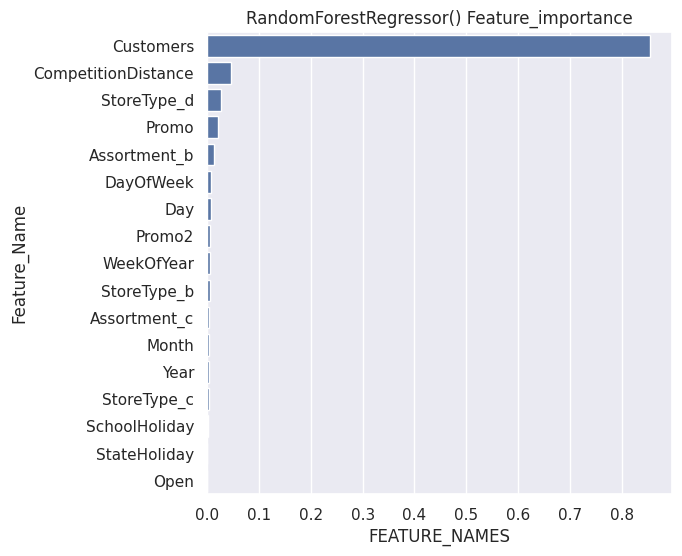

In [144]:
#RandomForest Feature Importance
rf_featimportance = featimportance(RandomForestRegressor())

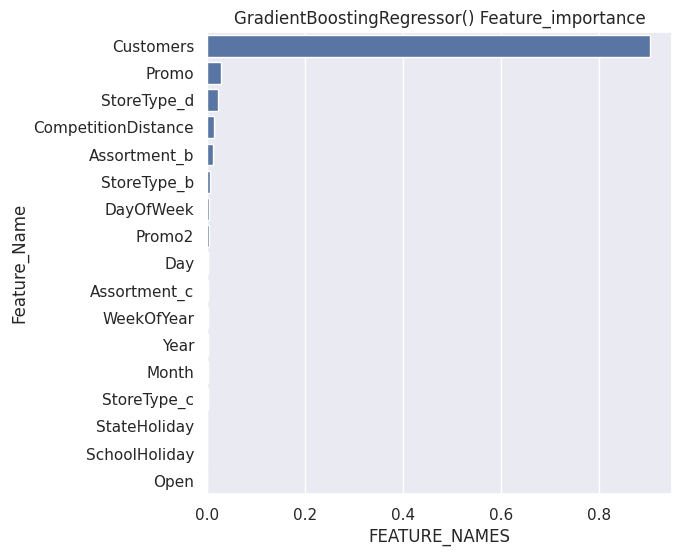

In [145]:
#GradientBoosting Feature Importance
gb_featimportance = featimportance(GradientBoostingRegressor())

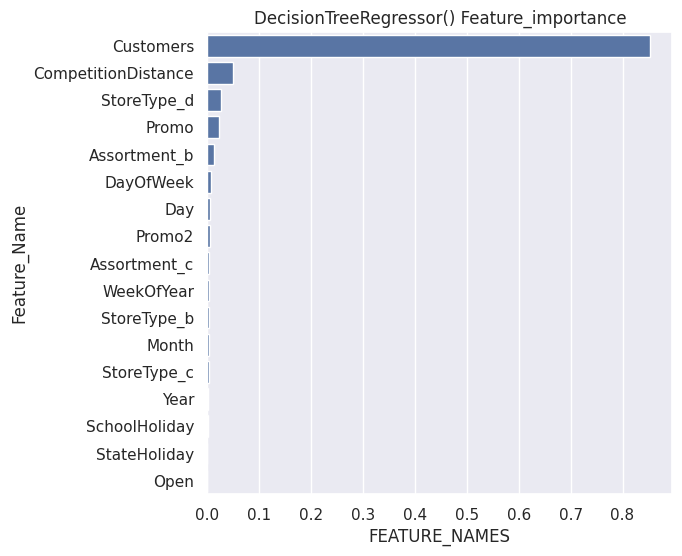

In [146]:
#DecisionTree Feature Importance
dt_featimportance = featimportance(DecisionTreeRegressor())

In [147]:
#merging all feature_importance to a single dataframe
Feat_Imp_DF = pd.merge(rf_featimportance,gb_featimportance)
Feat_Imp_DF = pd.merge(Feat_Imp_DF,dt_featimportance)

In [148]:
#feature_importance
Feat_Imp_DF

Feature_Name  RandomForestRegressor() Feature_importance  \
0             Customers                                      0.8553   
1   CompetitionDistance                                      0.0455   
2           StoreType_d                                      0.0259   
3                 Promo                                      0.0211   
4          Assortment_b                                      0.0123   
5             DayOfWeek                                      0.0070   
6                   Day                                      0.0063   
7                Promo2                                      0.0051   
8            WeekOfYear                                      0.0047   
9           StoreType_b                                      0.0044   
10         Assortment_c                                      0.0040   
11                Month                                      0.0027   
12                 Year                                      0.0024   
13          StoreType_c                                      0.0023   
14        SchoolHoliday                                      0.0009   
15         StateHoliday                                      0.0001   
16                 Open                                      0.0000   

    GradientBoostingRegressor() Feature_importance  \
0                                           0.9057   
1                                           0.0132   
2                                           0.0212   
3                                           0.0283   
4                                           0.0119   
5                                           0.0042   
6                                           0.0023   
7                                           0.0025   
8                                           0.0018   
9                                           0.0044   
10                                          0.0022   
11                                          0.0009   
12                                          0.0011   
13                                          0.0004   
14                                          0.0000   
15                                          0.0001   
16                                          0.0000   

    DecisionTreeRegressor() Feature_importance  
0                                       0.8533  
1                                       0.0485  
2                                       0.0261  
3                                       0.0222  
4                                       0.0132  
5                                       0.0067  
6                                       0.0056  
7                                       0.0052  
8                                       0.0039  
9                                       0.0031  
10                                      0.0039  
11                                      0.0027  
12                                      0.0021  
13                                      0.0024  
14                                      0.0009  
15                                      0.0002  
16                                      0.0000

Feature importances shows that 'Customers', 'CompetitionDistance', 'StoreType',	'Promo' are the most important features in predicting the sales.

The least important features are 'SchoolHoliday', 'StateHoliday', 'Open'.

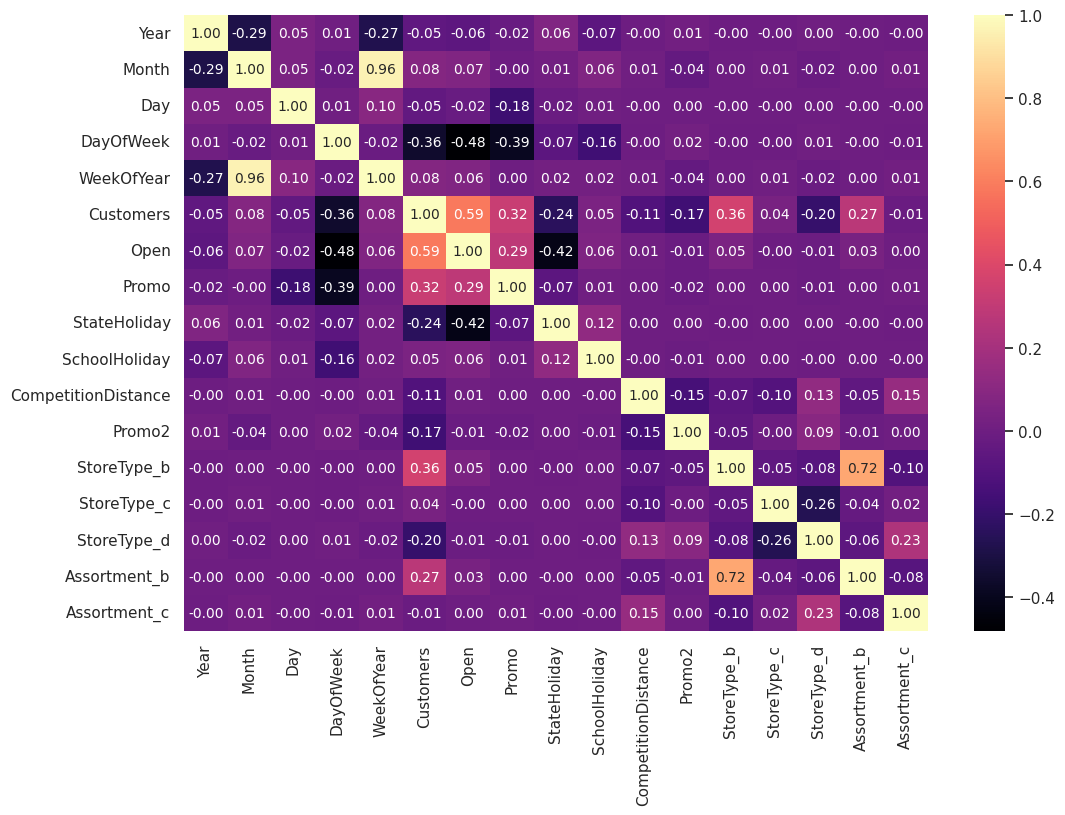

In [149]:
#correlation heatmap of features
plt.figure(figsize=(12,8))
sns.heatmap(features.corr(),annot=True,fmt='.2f',cmap='magma',annot_kws={'size': 10})
plt.show()

'WeekOfYear' has high correlation with 'Month'. Since 'WeekOfYear' is a feature introduced by us, dropping it.

In [150]:
#creating a function to drop least important features and highly correlated features
def finaldata(x):
  return sample_data.drop(['WeekOfYear', 'SchoolHoliday','StateHoliday', 'Open'], axis = 1)

In [151]:
finaldata = finaldata(sample_data)

In [152]:
finaldata.head() #viewing the final data

Year   Month     Day  DayOfWeek  Sales  Customers  Promo  \
334  0.2668  0.6237  1.7942     1.6163      0    -1.4329      0   
584 -1.0402  1.7955  1.0078    -0.9668   3204    -0.5905      0   
851 -1.0402 -0.5480 -1.5762    -1.4835      0    -1.4329      0   
371  0.2668  0.3308  1.1201     0.5830   3858    -0.4243      0   
30   1.5737  0.3308 -1.5762    -0.4502   5223    -0.2033      1   

     CompetitionDistance  Promo2  StoreType_b  StoreType_c  StoreType_d  \
334              -0.5394       0            0            1            0   
584              -0.5394       0            0            1            0   
851              -0.5394       0            0            1            0   
371              -0.5394       0            0            1            0   
30               -0.5394       0            0            1            0   

     Assortment_b  Assortment_c  
334             0             0  
584             0             0  
851             0             0  
371             0             0  
30              0             0

In [153]:
#splitting data into target and features
x = finaldata.drop('Sales',axis=1)
y = finaldata['Sales']

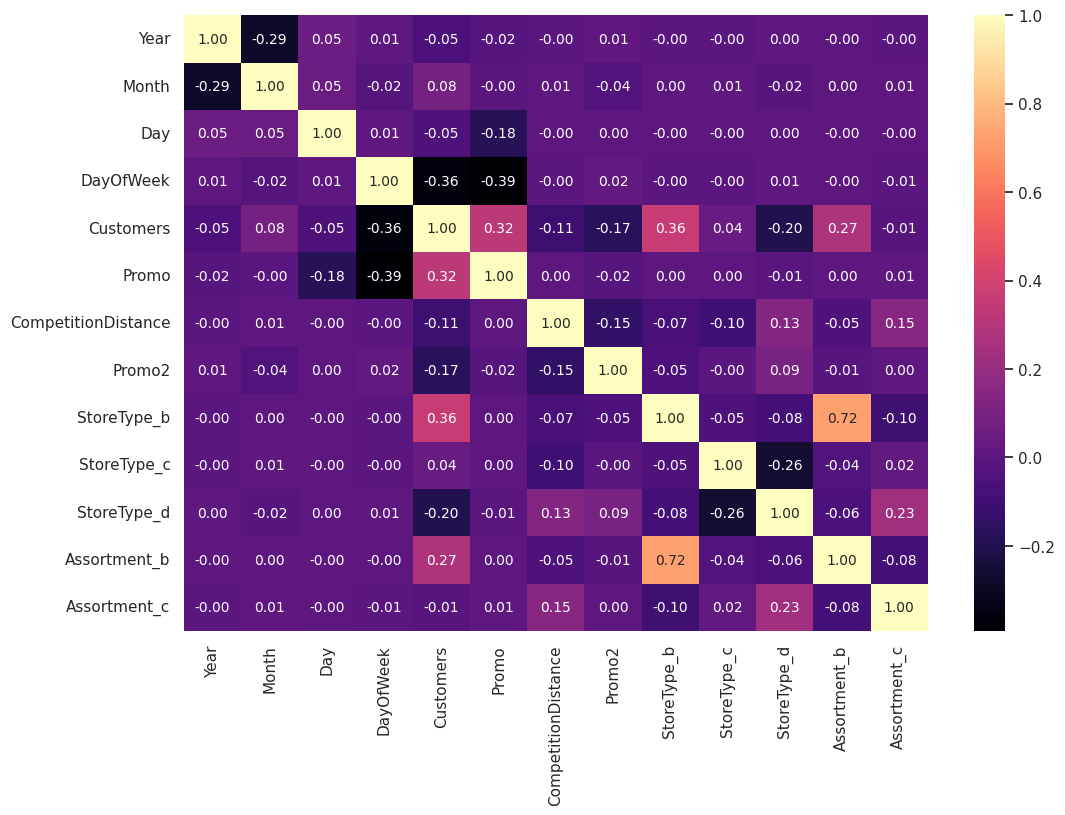

In [156]:
#Final correlation check of independent features
plt.figure(figsize=(12,8))
sns.heatmap(x.corr(),annot=True,fmt='.2f',cmap='magma',annot_kws={'size': 10})
plt.show()

## Model Building

In [157]:
#importing necessary libraries for model building
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

#importing metrics
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [158]:
#splitting the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test,y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [159]:
#Model Building
def evaluate_model(model,X_train, X_test,y_train, y_test):

  #Fit the model
  model.fit(X_train,y_train)

  #Prediction on train and test data
  y_train_pred = model.predict(X_train)
  y_test_pred = model.predict(X_test)

  #metrics for train data
  train_r2 = r2_score(y_train,y_train_pred)
  train_mae = mean_absolute_error(y_train,y_train_pred)
  train_mse = mean_squared_error(y_train,y_train_pred)
  train_rmse = np.sqrt(train_mse)

  #metrics for test data
  test_r2 = r2_score(y_test,y_test_pred)
  test_mae = mean_absolute_error(y_test,y_test_pred)
  test_mse = mean_squared_error(y_test,y_test_pred)
  test_rmse = np.sqrt(test_mse)

  #printing the metrics
  print(f'Model Name:',str(model))

  #creating a dictionary for metrics
  metrics = {'Train_R2':train_r2,'Test_R2':test_r2,'Train_MAE': train_mae,'Test_MAE': test_mae,
             'Train_MSE':train_mse, 'Test_MSE':test_mse, 'Train_RMSE': train_rmse,'Test_RMSE': test_rmse}

  pd.options.display.float_format = "{:,.4f}".format

  #creating a dataframe to store the metrics
  metrics_df = pd.DataFrame([metrics])
  print(metrics_df.T)
  plot_data = pd.DataFrame({'Actual':y_test[:150], 'Predicted':y_test_pred[:150]})

  #plotting actual vs predicted sales to see how well the model fits
  sns.lmplot(data=plot_data, x= 'Actual', y = 'Predicted',height=4,aspect=2, scatter_kws={'color':'black'}, line_kws={'color':'red'})
  plt.title('Actual vs Predicted Test values for '+str(model))
  plt.show()

  return metrics, metrics_df

Model Name: LinearRegression()
                        0
Train_R2           0.8900
Test_R2            0.8888
Train_MAE        902.4264
Test_MAE         906.5725
Train_MSE  1,577,507.3877
Test_MSE   1,613,284.2664
Train_RMSE     1,255.9886
Test_RMSE      1,270.1513


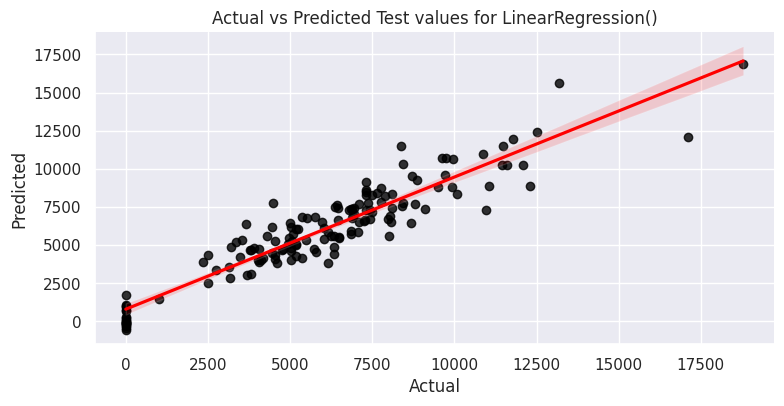

In [160]:
#Linear Regression Model
LR_metrics, LR_metrics_df = evaluate_model(LinearRegression(),X_train, X_test,y_train, y_test)

Model Name: RandomForestRegressor()
                      0
Train_R2         0.9953
Test_R2          0.9661
Train_MAE      166.6727
Test_MAE       446.3034
Train_MSE   67,785.7408
Test_MSE   492,198.1692
Train_RMSE     260.3569
Test_RMSE      701.5684


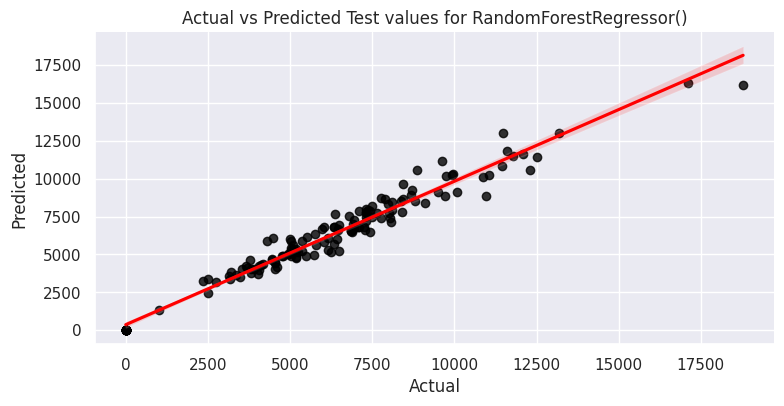

In [161]:
#Random Forest Model
RF_metrics, RF_metrics_df = evaluate_model(RandomForestRegressor(),X_train, X_test,y_train, y_test)

Model Name: GradientBoostingRegressor()
                      0
Train_R2         0.9337
Test_R2          0.9322
Train_MAE      685.1551
Test_MAE       691.5276
Train_MSE  951,665.6055
Test_MSE   983,884.3431
Train_RMSE     975.5335
Test_RMSE      991.9094


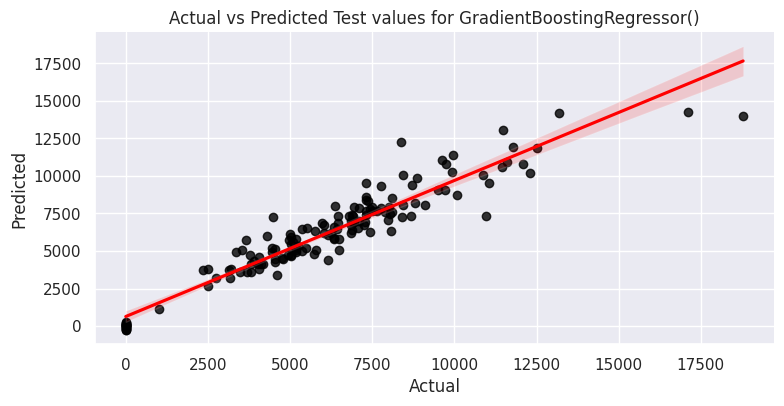

In [162]:
#Gradient Boosting Model
GB_metrics, GB_metrics_df = evaluate_model(GradientBoostingRegressor(),X_train, X_test,y_train, y_test)

Model Name: AdaBoostRegressor()
                        0
Train_R2           0.6311
Test_R2            0.6332
Train_MAE      1,881.0392
Test_MAE       1,880.6785
Train_MSE  5,291,522.3192
Test_MSE   5,321,471.5303
Train_RMSE     2,300.3309
Test_RMSE      2,306.8315


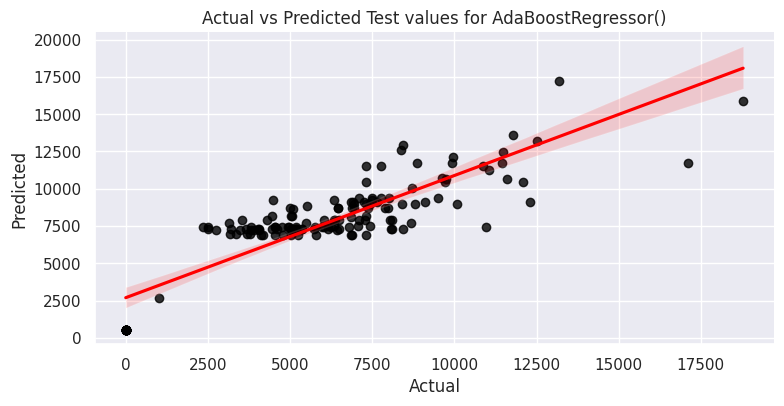

In [163]:
#ADABoost Model
ADA_metrics, ADA_metrics_df = evaluate_model(AdaBoostRegressor(),X_train, X_test,y_train, y_test)

Model Name: DecisionTreeRegressor()
                      0
Train_R2         1.0000
Test_R2          0.9322
Train_MAE        0.1026
Test_MAE       604.4028
Train_MSE       84.1682
Test_MSE   984,086.7134
Train_RMSE       9.1743
Test_RMSE      992.0114


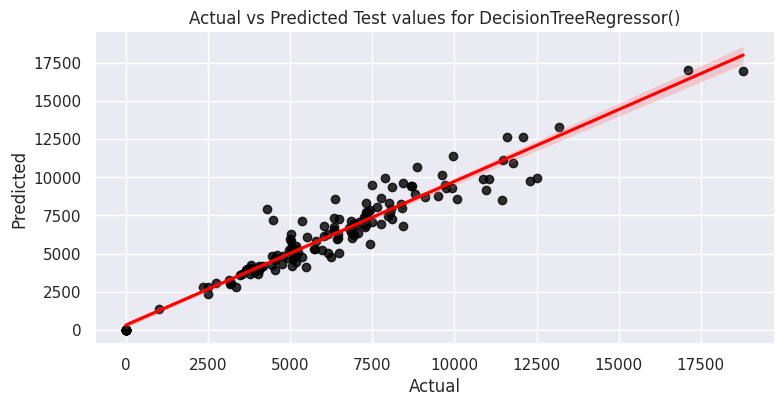

In [164]:
#Decision Tree Model
DT_metrics, DT_metrics_df = evaluate_model(DecisionTreeRegressor(),X_train, X_test,y_train, y_test)

Model Name: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
                      0
Train_R2         0.9726
Test_R2          0.9683
Train_MAE      444.6107
Test_MAE       463.1908
Train_MSE  393,080.3381
Test_MSE   459,236.8415
Train_RMSE     626.9612
Test_RMSE      677.6702


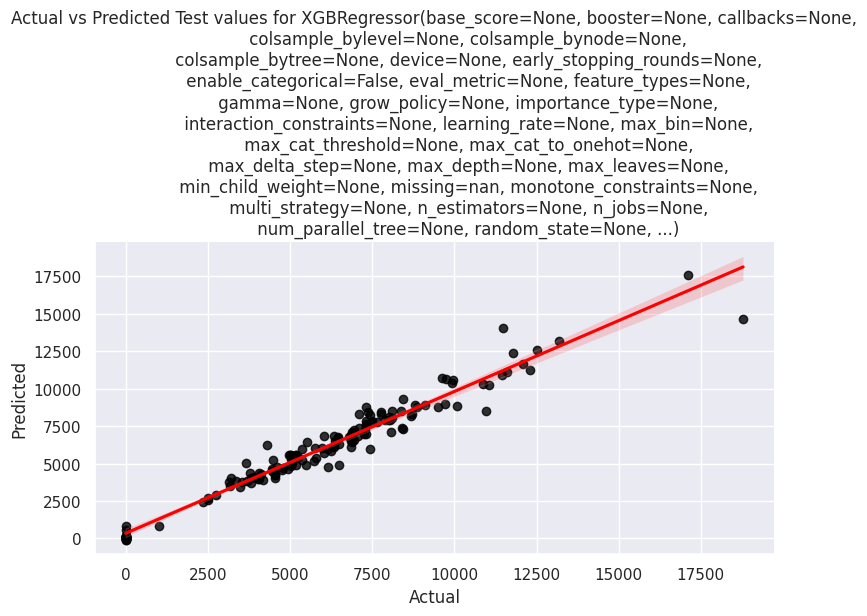

In [165]:
#XGBoost Model
XGB_metrics, XGB_metrics_df = evaluate_model(XGBRegressor(),X_train, X_test,y_train, y_test)

Model Name: KNeighborsRegressor()
                        0
Train_R2           0.9383
Test_R2            0.9043
Train_MAE        646.1672
Test_MAE         803.2617
Train_MSE    884,836.0738
Test_MSE   1,388,426.4675
Train_RMSE       940.6573
Test_RMSE      1,178.3151


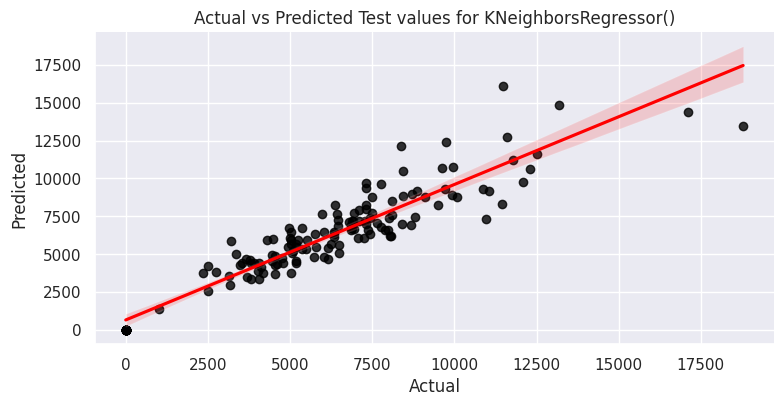

In [166]:
#KNearestNeighbour Model
KNN_metrics, KNN_metrics_df = evaluate_model(KNeighborsRegressor(),X_train, X_test,y_train, y_test)

In [167]:
#Creating a dataframe to display the metrics of all models
dict_data = [LR_metrics,RF_metrics,GB_metrics,ADA_metrics,DT_metrics,XGB_metrics,KNN_metrics]
Final_df = pd.DataFrame.from_dict(dict_data)
Final_df.index = ['LR_metrics','RF_metrics','GB_metrics','ADA_metrics','DT_metrics','XGB_metrics','KNN_metrics']

In [168]:
Final_df

Train_R2  Test_R2  Train_MAE   Test_MAE      Train_MSE  \
LR_metrics     0.8900   0.8888   902.4264   906.5725 1,577,507.3877   
RF_metrics     0.9953   0.9661   166.6727   446.3034    67,785.7408   
GB_metrics     0.9337   0.9322   685.1551   691.5276   951,665.6055   
ADA_metrics    0.6311   0.6332 1,881.0392 1,880.6785 5,291,522.3192   
DT_metrics     1.0000   0.9322     0.1026   604.4028        84.1682   
XGB_metrics    0.9726   0.9683   444.6107   463.1908   393,080.3381   
KNN_metrics    0.9383   0.9043   646.1672   803.2617   884,836.0738   

                  Test_MSE  Train_RMSE  Test_RMSE  
LR_metrics  1,613,284.2664  1,255.9886 1,270.1513  
RF_metrics    492,198.1692    260.3569   701.5684  
GB_metrics    983,884.3431    975.5335   991.9094  
ADA_metrics 5,321,471.5303  2,300.3309 2,306.8315  
DT_metrics    984,086.7134      9.1743   992.0114  
XGB_metrics   459,236.8415    626.9612   677.6702  
KNN_metrics 1,388,426.4675    940.6573 1,178.3151

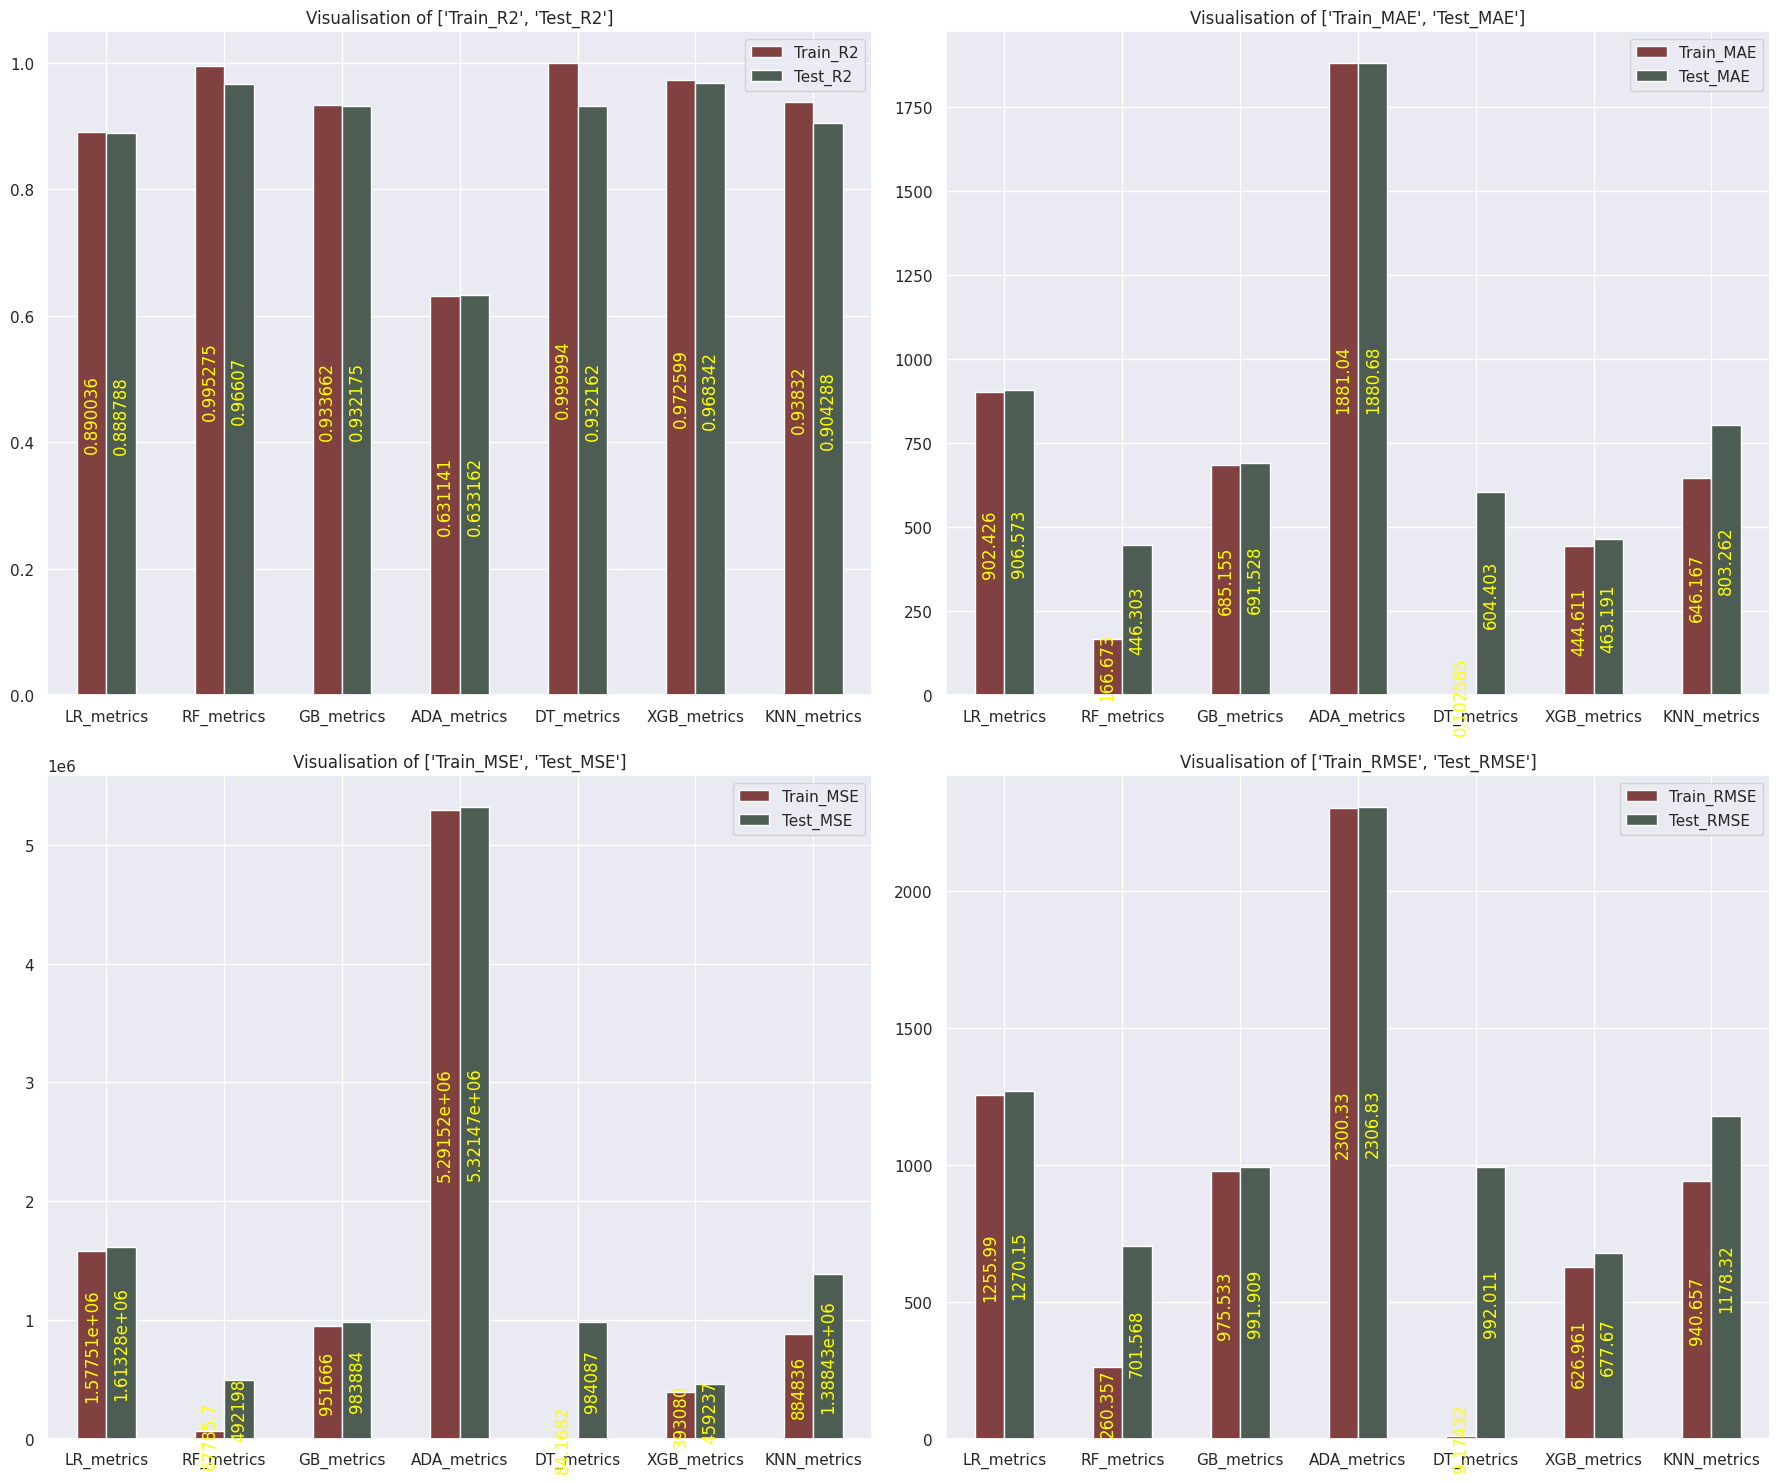

In [169]:
# Visualisation of metrics of all models
metric = [['Train_R2','Test_R2'],['Train_MAE','Test_MAE'],['Train_MSE','Test_MSE'],['Train_RMSE','Test_RMSE']]
axis = [(0,0),(0,1),(1,0),(1,1)]
f, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (18,15))
for i in range(len(metric)):
  x = Final_df[metric[i]].plot(kind='bar',ax = ax[axis[i]], color=['#814141','#4D5D53'], title = 'Visualisation of '+str(metric[i]))
  x.bar_label(x.containers[0],rotation=90,label_type = 'center',color = '#FFFF00')
  x.bar_label(x.containers[1],rotation=90,label_type = 'center',color = '#FFFF00')
  x.set_xticks(list(range(7)),labels = Final_df.index, rotation=0)

plt.tight_layout()
plt.show()

## Stacking

Except ADABoost all other models have given good results. So Stacking all models except ADABoost

In [170]:
#importing stacking regressor
from sklearn.ensemble import StackingRegressor

#defining the estimators
estimators = [('lr',LinearRegression()),
              ('xgb',XGBRegressor()),
              ('gb',GradientBoostingRegressor()),
              ('dt',DecisionTreeRegressor()),
              ('knn',KNeighborsRegressor()),]

#stacking model
regressor = StackingRegressor(estimators = estimators, final_estimator = RandomForestRegressor(), cv=10,n_jobs=-1)

Model Name: StackingRegressor(cv=10,
                  estimators=[('lr', LinearRegression()),
                              ('xgb',
                               XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interact...
                                            max_delta

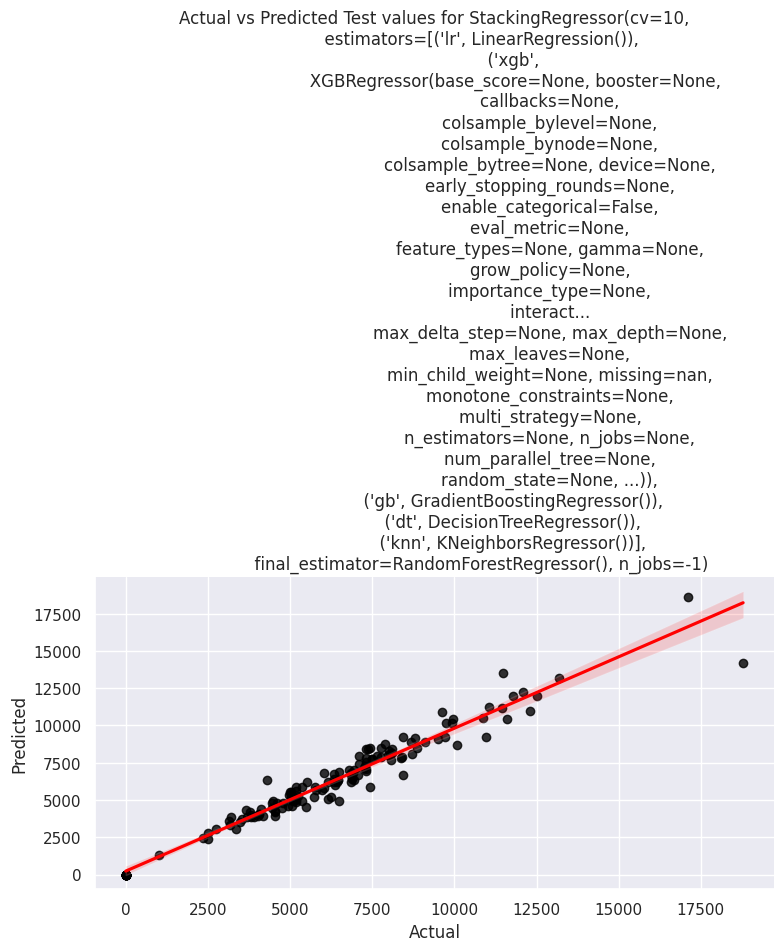

In [171]:
stacking_metrics, stacking_df = evaluate_model(regressor, X_train,X_test,y_train, y_test)

In [172]:
stacking_df.index = ['Stacking_Regressor']

In [173]:
stacking_df.T

Stacking_Regressor
Train_R2                0.9836
Test_R2                 0.9720
Train_MAE             311.6900
Test_MAE              415.4406
Train_MSE         235,623.6170
Test_MSE          405,786.2223
Train_RMSE            485.4108
Test_RMSE             637.0135

## Conclusion

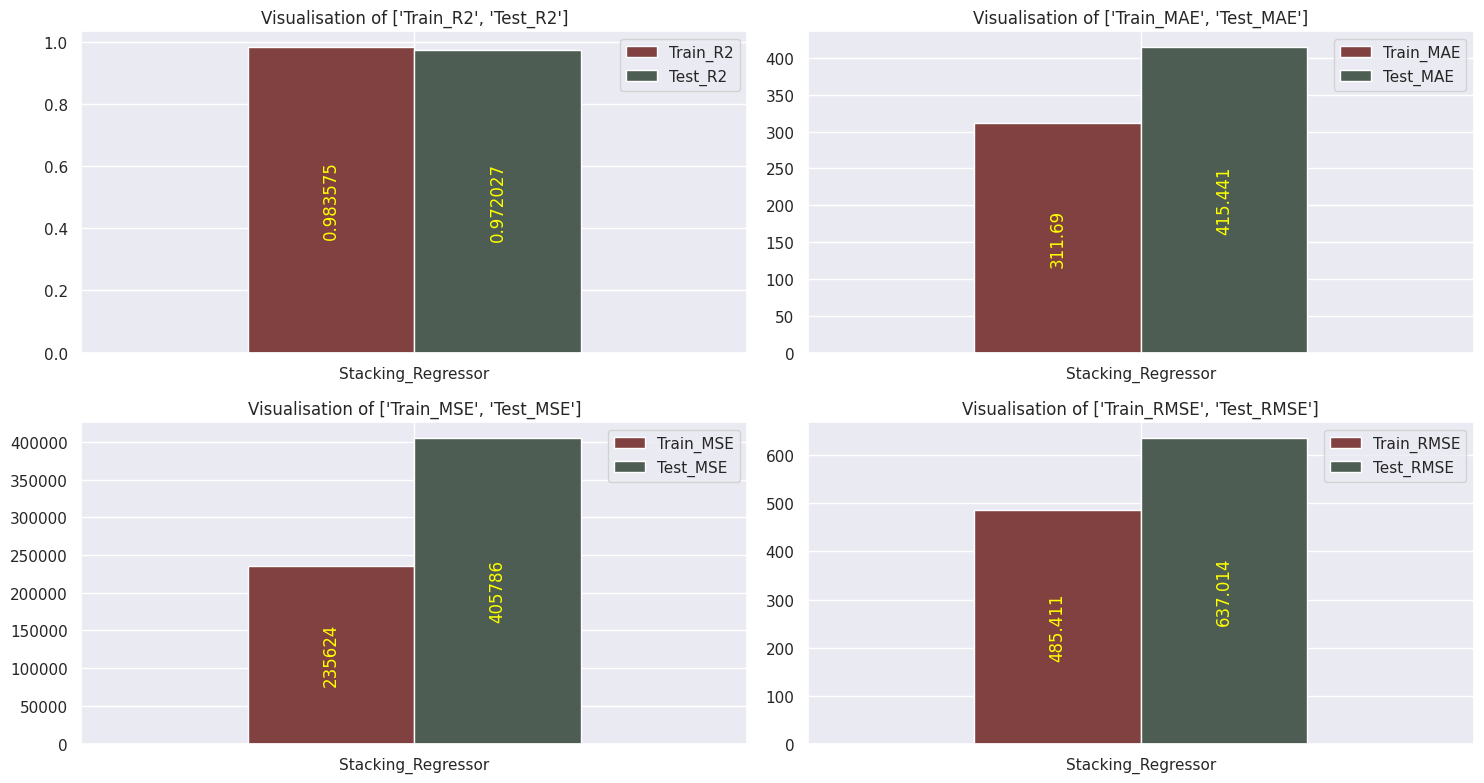

In [189]:
# Visualisation of stacking metrics
metric = [['Train_R2','Test_R2'],['Train_MAE','Test_MAE'],['Train_MSE','Test_MSE'],['Train_RMSE','Test_RMSE']]
axis = [(0,0),(0,1),(1,0),(1,1)]
f, ax = plt.subplots(nrows = 2,ncols = 2,figsize = (15,8))
for i in range(len(metric)):
  x = stacking_df[metric[i]].plot(kind='bar',ax = ax[axis[i]], color=['#814141','#4D5D53'], title = 'Visualisation of '+str(metric[i]))
  x.bar_label(x.containers[0],rotation=90,label_type = 'center',color = '#FFFF00')
  x.bar_label(x.containers[1],rotation=90,label_type = 'center',color = '#FFFF00')
  x.set_xticks(list(range(1)),labels = stacking_df.index, rotation=0)

plt.tight_layout()
plt.show()

Stacking Regressor has given us the best Test_R2_score of 0.972 and Test_RMSE value of 637.0135. Finalising the stacking model.

In [175]:
#Pickling
import pickle
pickle.dump(regressor, open('Sales_Prediction_Model.pkl','wb')) #pickle file to save the stacking model